In [1]:
# Load dependencies

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt

/tmp/ipykernel_923168/146719294.py:10: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
# Read in the structured correlation data
# Update filename based on epoch duration

corr_df = pd.read_csv("preprocessed_interpolate_bandpass_.1_20/merged_corr_df_1s_epoch.csv")
len(corr_df)

325

In [3]:
# This filters out extreme values that are > +/-.3
# This is a brute-force way of excluding outliers
filter_index = (corr_df[["TP10", "AF7", "AF8", "TP9"]] > 0.4).any(1)  | (corr_df[["TP10", "AF7", "AF8", "TP9"]] < -0.4).any(1) | (corr_df["Signal Drop"] == 1)

# Print how many are filtered out
filter_index.sum()

141

In [4]:
# Rename the time variable for easier modeling

corr_df = corr_df.rename(columns={'Time (sec)': 'Time'})

In [5]:
# create a dataframe that does listwise deletion for missing electrode or behavioral data
corr_df_clean_electrodes = corr_df.dropna(subset=["TP9", "AF7", "AF8", "TP10", "Performance", "Time"])

# create a dataframe that does listwise deletion for missing electrode or performance behavioral data
corr_df_clean_electrodes_performance = corr_df.dropna(subset=["TP9", "AF7", "AF8", "TP10", "Performance"])

# create a dataframe that does listwise deletion for missing electrode or performance time data
corr_df_clean_electrodes_time = corr_df.dropna(subset=["TP9", "AF7", "AF8", "TP10", "Time"])

# create a dataframe that does listwise deletion for missing electrode or self-report
corr_df_clean_trust = corr_df.dropna(subset=["TP9", "AF7", "AF8", "TP10", "affective_trust", "cognitive_trust", "affecttrust_corr", "cognitivetrust_corr"])

In [6]:
# Get some data on the impact of listwise deletion

print(f"The corr_df dataframe is {len(corr_df)} rows long")
print(f"The corr_df_clean_electrodes dataframe is {len(corr_df_clean_electrodes)} rows long")
print(f"The corr_df_clean_electrodes_performance dataframe is {len(corr_df_clean_electrodes_performance)} rows long")
print(f"The corr_df_clean_electrodes_time is {len(corr_df_clean_electrodes_time)} rows long")
print(f"The corr_df_clean_trust is {len(corr_df_clean_trust)} rows long")

print(f"The corr_df dataframe has {corr_df['subj'].nunique()} unique participants")
print(f"The corr_df_clean_electrodes has {corr_df_clean_electrodes['subj'].nunique()} unique participants")
print(f"The corr_df_clean_electrodes_performance has {corr_df_clean_electrodes_performance['subj'].nunique()} unique participants")
print(f"The corr_df_clean_electrodes_time has {corr_df_clean_electrodes_time['subj'].nunique()} unique participants")
print(f"The corr_df_clean_trust  has {corr_df_clean_trust ['subj'].nunique()} unique participants")


The corr_df dataframe is 325 rows long
The corr_df_clean_electrodes dataframe is 285 rows long
The corr_df_clean_electrodes_performance dataframe is 285 rows long
The corr_df_clean_electrodes_time is 285 rows long
The corr_df_clean_trust is 203 rows long
The corr_df dataframe has 150 unique participants
The corr_df_clean_electrodes has 142 unique participants
The corr_df_clean_electrodes_performance has 142 unique participants
The corr_df_clean_electrodes_time has 142 unique participants
The corr_df_clean_trust  has 113 unique participants


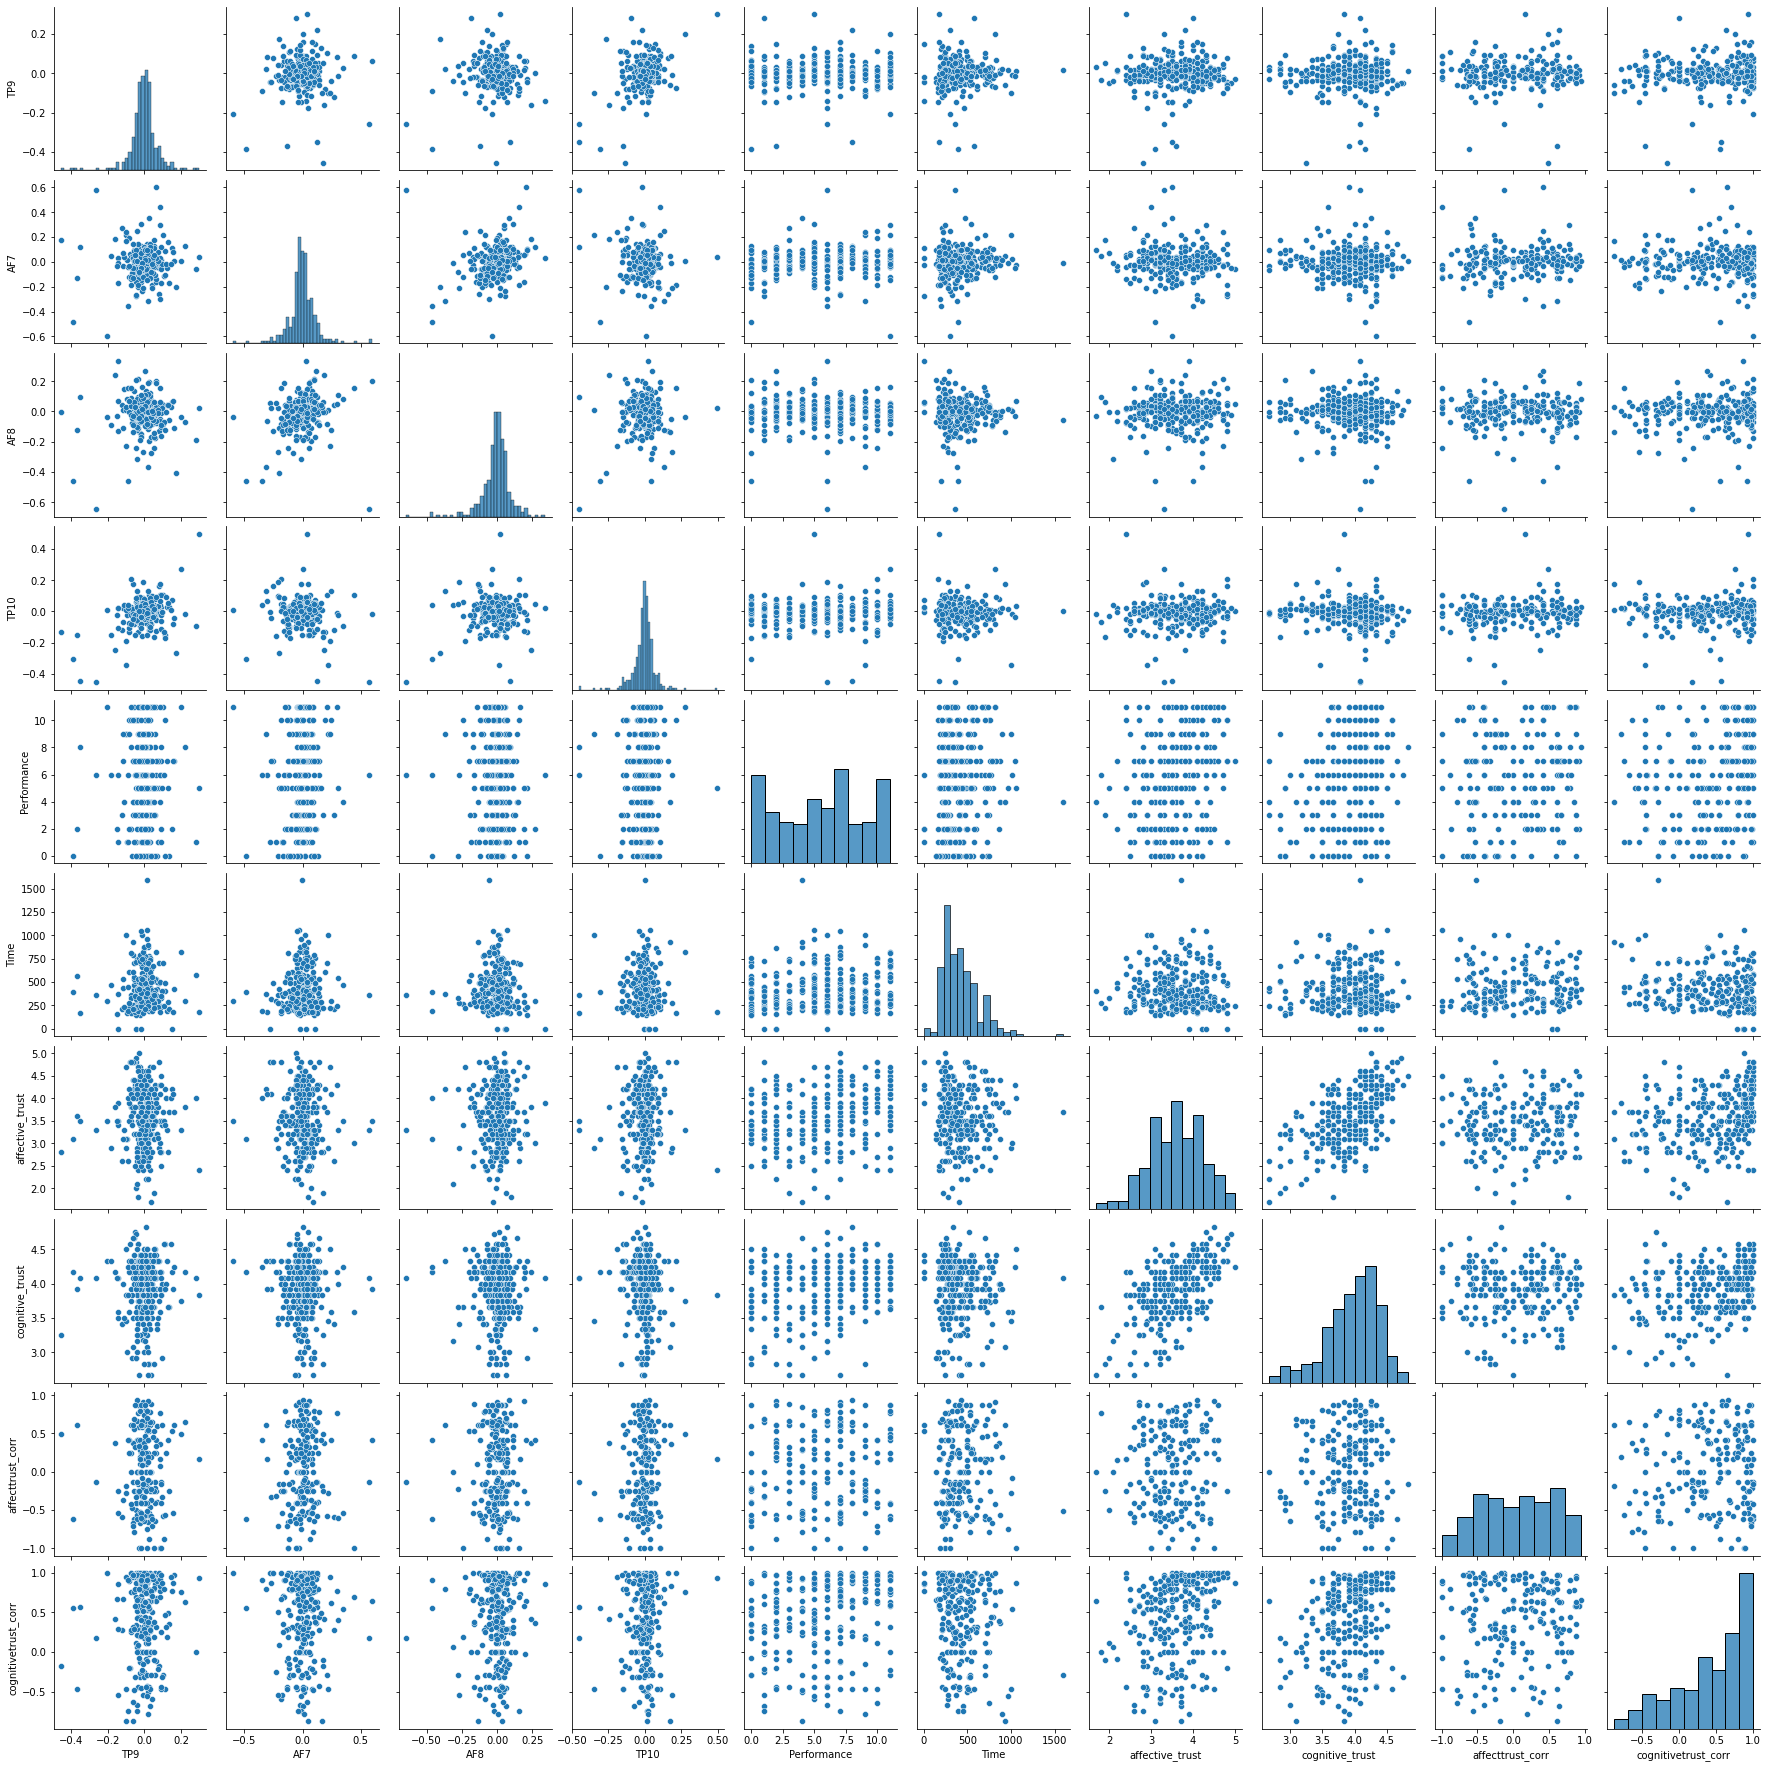

In [7]:
# Get some insights into the data
sns.pairplot(corr_df[["TP9", "AF7", "AF8", "TP10", "Performance", "Time", "affective_trust", "cognitive_trust", "affecttrust_corr", "cognitivetrust_corr" ]])
plt.show()

In [8]:
# Test if ISCs in a given electrode increase as a function of session
# This would test if participant ISCs increase over time

# Fit a mixed model
# This formula specifies a model with:
    # ISC for a given electrode as the DV
    # ses as a fixed effect
    # subject as a random intercepts

model_af7_isc_ses = smf.mixedlm("AF7 ~ ses", corr_df_clean_electrodes, groups=corr_df_clean_electrodes["subj"])
model_af8_isc_ses = smf.mixedlm("AF8 ~ ses", corr_df_clean_electrodes, groups=corr_df_clean_electrodes["subj"])
model_tp9_isc_ses = smf.mixedlm("TP9 ~ ses", corr_df_clean_electrodes, groups=corr_df_clean_electrodes["subj"])
model_tp10_isc_ses = smf.mixedlm("TP10 ~ ses", corr_df_clean_electrodes, groups=corr_df_clean_electrodes["subj"])

# Fit the model
result_af7_isc_ses = model_af7_isc_ses.fit()
result_af8_isc_ses = model_af8_isc_ses.fit()
result_tp9_isc_ses = model_tp9_isc_ses.fit()
result_tp10_isc_ses = model_tp10_isc_ses.fit()

# Print the summary of the model fit
print(result_af7_isc_ses.summary())
print(result_af8_isc_ses.summary())
print(result_tp9_isc_ses.summary())
print(result_tp10_isc_ses.summary())

/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: AF7     
No. Observations: 285     Method:             REML    
No. Groups:       142     Scale:              0.0126  
Min. group size:  1       Log-Likelihood:     211.3791
Max. group size:  3       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.019    0.017  1.095 0.273 -0.015  0.053
ses         -0.012    0.008 -1.436 0.151 -0.027  0.004
Group Var    0.000    0.007                           

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: AF8     
No. Observations: 285     Method:             REML    
No. Groups:       142     Scale:              0.0100  
Min. group size:  1       Log-Likelihood:     245.3002
Max. group size:  3       C

/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


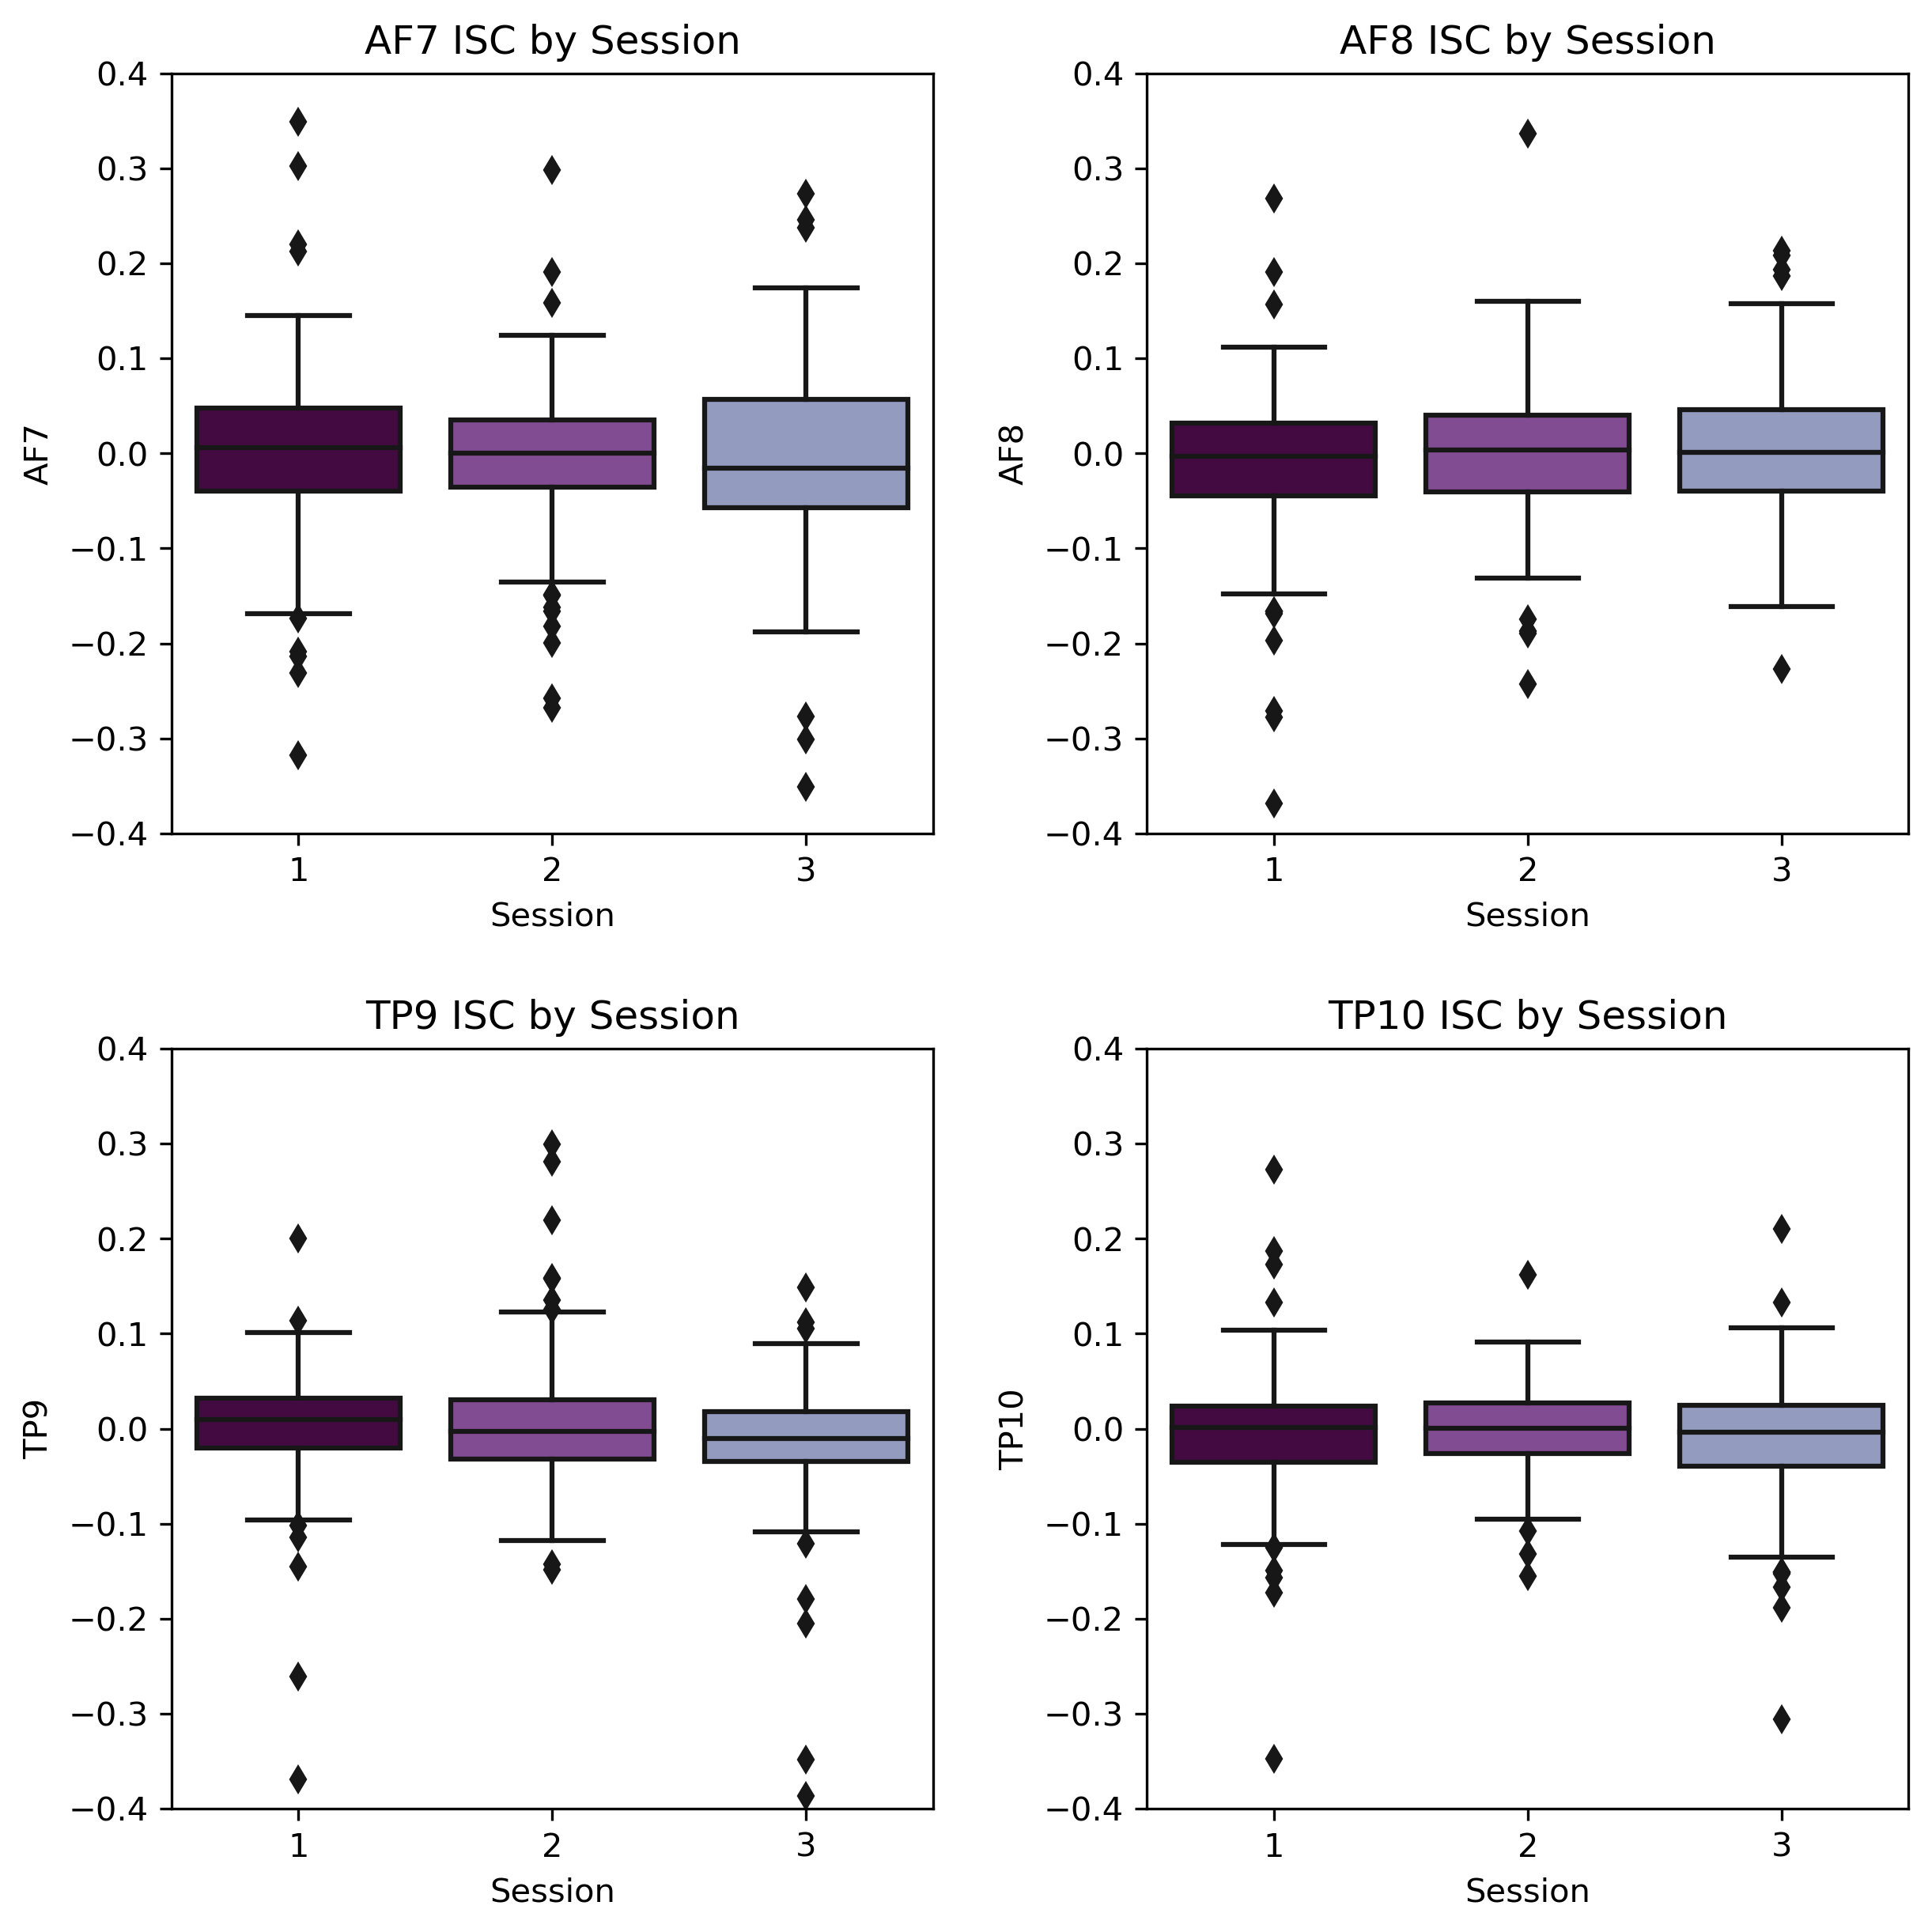

In [9]:
# Plot boxplot of electrode ISC by session
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5), dpi=300)  # Set figure size to 8.5x8.5 inches

channels = ["AF7", "AF8", "TP9", "TP10"]
# Define custom color palette, from color brewer
color_palette = {1: '#4d004b', 2: '#88419d', 3: '#8c96c6'}

for i, channel in enumerate(channels):
    sns.boxplot(x="ses", y=channel, data=corr_df_clean_electrodes, ax=axs[i//2, i%2],
                palette=color_palette)  # Use the custom palette for box plots
    axs[i//2, i%2].set_title(f"{channel} ISC by Session")  # Set title for each subplot
    axs[i//2, i%2].set_ylabel(channel)  # Explicitly set y-axis label to the channel name
    axs[i//2, i%2].set_ylim(-0.4, 0.4)  # Set the y-axis range to be from -0.3 to 0.3
    axs[i//2, i%2].set_xlabel("Session")  # Set x-axis label to "Session"

# Ensure the background of the figure is white
fig.patch.set_facecolor('white')

plt.tight_layout(pad=2.0)  # Increase padding between plots for clarity
plt.savefig("plots/isc_by_session_boxplot.png", bbox_inches='tight', facecolor=fig.get_facecolor())  # Save the figure as a PNG file
plt.show()


In [10]:
# Test if Average Cognitive and Affective Trust increases as a function of session
# This would test if participant average cognitive and trust increase over time

# Fit a mixed model
# This formula specifies a model with:
    # average trust scale for a trust scale
    # ses as a fixed effect
    # subject as a random intercepts

model_average_cognitive_trust_ses = smf.mixedlm("cognitive_trust ~ ses", corr_df_clean_trust, groups=corr_df_clean_trust["subj"])
model_average_affective_trust_ses = smf.mixedlm("affective_trust ~ ses", corr_df_clean_trust, groups=corr_df_clean_trust["subj"])


# Fit the model
result_average_cognitive_trust_ses = model_average_cognitive_trust_ses.fit()
result_average_affective_trust_ses = model_average_affective_trust_ses.fit()


# Print the summary of the model fit
print(result_average_cognitive_trust_ses.summary())
print(result_average_affective_trust_ses.summary())


            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: cognitive_trust
No. Observations: 203     Method:             REML           
No. Groups:       113     Scale:              0.0551         
Min. group size:  1       Log-Likelihood:     -70.1435       
Max. group size:  3       Converged:          Yes            
Mean group size:  1.8                                        
---------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------
Intercept   3.750      0.053   70.873   0.000    3.647    3.854
ses         0.078      0.024    3.289   0.001    0.032    0.125
Group Var   0.084      0.103                                   

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: affective_trust
No. Observations: 203     Method:             REML           
No. Groups:       1

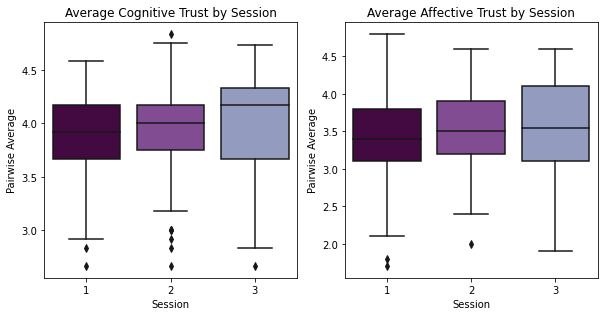

In [11]:
# Plot boxplot of trust by session
plt.figure(figsize=(8.5, 4.5))

# Define color palette for ses levels
color_palette = {1: '#4d004b', 2: '#88419d', 3: '#8c96c6'}

# Setting the color palette in seaborn
sns.set_palette(list(color_palette.values()))


# Plot boxplots for cognitivetrust_corr
plt.subplot(1, 2, 1)
sns.boxplot(x='ses', y='cognitive_trust', data=corr_df, palette=color_palette)
plt.title('Average Cognitive Trust by Session')
plt.xlabel('Session')  # Set horizontal axis label
plt.ylabel('Pairwise Average')  # Set vertical axis label

# Plot boxplots for affecttrust_corr
plt.subplot(1, 2, 2)
sns.boxplot(x='ses', y='affective_trust', data=corr_df_clean_trust, palette=color_palette)
plt.title('Average Affective Trust by Session')
plt.xlabel('Session')  # Set horizontal axis label
plt.ylabel('Pairwise Average')  # Set vertical axis label

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('plots/average_trust_by_session_boxplot.png', dpi=300)

# Show the plot
plt.show()


In [12]:
# NOTE: AFFECTIVE TRUST MODEL IS SINGULAR AND FAILS TO CONVERGE
# you fit a simple OSL in the next cell

# Test if Pairweise Cognitive and Affective Trust correlation increases as a function of session
# This would test if participant pairwise cognitive and trust correlations increase over time

# Fit a mixed model
# This formula specifies a model with:
    # pairwise trust correlation for a trust scale
    # ses as a fixed effect
    # subject as a random intercepts

model_correl_cognitive_trust_ses = smf.mixedlm("cognitivetrust_corr ~ ses", corr_df_clean_trust, groups=corr_df_clean_trust["subj"])
model_correl_affective_trust_ses = smf.mixedlm("affecttrust_corr ~ ses", corr_df_clean_trust, groups=corr_df_clean_trust["subj"])


# Fit the model
result_correl_cognitive_trust_ses = model_correl_cognitive_trust_ses.fit()
result_correl_affective_trust_ses = model_correl_affective_trust_ses.fit()


# Print the summary of the model fit
print(result_correl_cognitive_trust_ses.summary())
print(result_correl_affective_trust_ses.summary())


              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: cognitivetrust_corr
No. Observations: 203     Method:             REML               
No. Groups:       113     Scale:              0.1194             
Min. group size:  1       Log-Likelihood:     -131.6826          
Max. group size:  3       Converged:          Yes                
Mean group size:  1.8                                            
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|    [0.025    0.975]
--------------------------------------------------------------------
Intercept    0.214       0.073    2.926    0.003     0.071     0.357
ses          0.112       0.034    3.277    0.001     0.045     0.179
Group Var    0.117       0.112                                      

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: affecttrust_corr
No. Observations: 203   

In [13]:
# Simple OLS since the more complicated model didn't work

model_correl_affective_trust_ses_ols = smf.ols("affecttrust_corr ~ ses", data=corr_df_clean_trust)
result_correl_affective_trust_ses_ols = model_correl_affective_trust_ses_ols.fit()
print(result_correl_affective_trust_ses_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       affecttrust_corr   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4579
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.499
Time:                        15:12:20   Log-Likelihood:                -151.25
No. Observations:                 203   AIC:                             306.5
Df Residuals:                     201   BIC:                             313.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1093      0.089      1.231      0.2

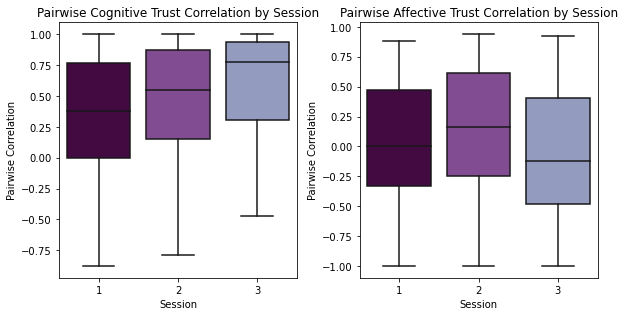

In [14]:
# Plot boxplot of correlation of trust by session
plt.figure(figsize=(8.5, 4.5))

# Define color palette for ses levels
color_palette = {1: '#4d004b', 2: '#88419d', 3: '#8c96c6'}

# Setting the color palette in seaborn
sns.set_palette(list(color_palette.values()))

# Plot boxplots for cognitivetrust_corr
plt.subplot(1, 2, 1)
sns.boxplot(x='ses', y='cognitivetrust_corr', data=corr_df, palette=color_palette)
plt.title('Pairwise Cognitive Trust Correlation by Session')
plt.xlabel('Session')  # Set horizontal axis label
plt.ylabel('Pairwise Correlation')  # Set vertical axis label

# Plot boxplots for affecttrust_corr
plt.subplot(1, 2, 2)
sns.boxplot(x='ses', y='affecttrust_corr', data=corr_df_clean_trust, palette=color_palette)
plt.title('Pairwise Affective Trust Correlation by Session')
plt.xlabel('Session')  # Set horizontal axis label
plt.ylabel('Pairwise Correlation')  # Set vertical axis label

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('plots/correl_trust_by_session_boxplot.png', dpi=300)

# Show the plot
plt.show()


In [15]:
# Fit a complex mixed model that deals with sessions nested within sujects
# This model:
    # "Performance ~ Electrode" defines "Performance" as the DV and"AF7" as an independent variable (fixed effect)
    # groups=corr_df["subj"] specifies that the random intercepts should vary by "subj" to account for the non-independence of observations within subjects
    #re_formula="1" indicates that there is a random intercept for each subject
    # vc_formula={"ses": "0 + C(ses)"} specifies a variance component for "ses", treating sessions as a categorical variable (with C(ses)) and allowing for varying intercepts by "ses" without a slope
# This may not converge, so we fit simpler models below

# Define the models
model_af7 = smf.mixedlm("Performance ~ AF7", data=corr_df_clean_electrodes_performance, groups=corr_df_clean_electrodes_performance["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_af8 = smf.mixedlm("Performance ~ AF8", data=corr_df_clean_electrodes_performance, groups=corr_df_clean_electrodes_performance["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp9 = smf.mixedlm("Performance ~ TP9", data=corr_df_clean_electrodes_performance, groups=corr_df_clean_electrodes_performance["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp10 = smf.mixedlm("Performance ~ TP10", data=corr_df_clean_electrodes_performance, groups=corr_df_clean_electrodes_performance["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

# Fit the model
results_af7 = model_af7.fit()
results_af8 = model_af8.fit()
results_tp9 = model_tp9.fit()
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_af7.summary())
print(results_af8.summary())
print(results_tp9.summary())
print(results_tp10.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 285     Method:             REML       
No. Groups:       142     Scale:              2.9695     
Min. group size:  1       Log-Likelihood:     -710.6527  
Max. group size:  3       Converged:          Yes        
Mean group size:  2.0                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.507     0.245  22.469  0.000   5.026   5.987
AF7         3.525     1.394   2.529  0.011   0.793   6.256
Group Var   5.822                                         
ses Var     1.823                                         

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 285     Method:             REML       
No. Groups:       142     

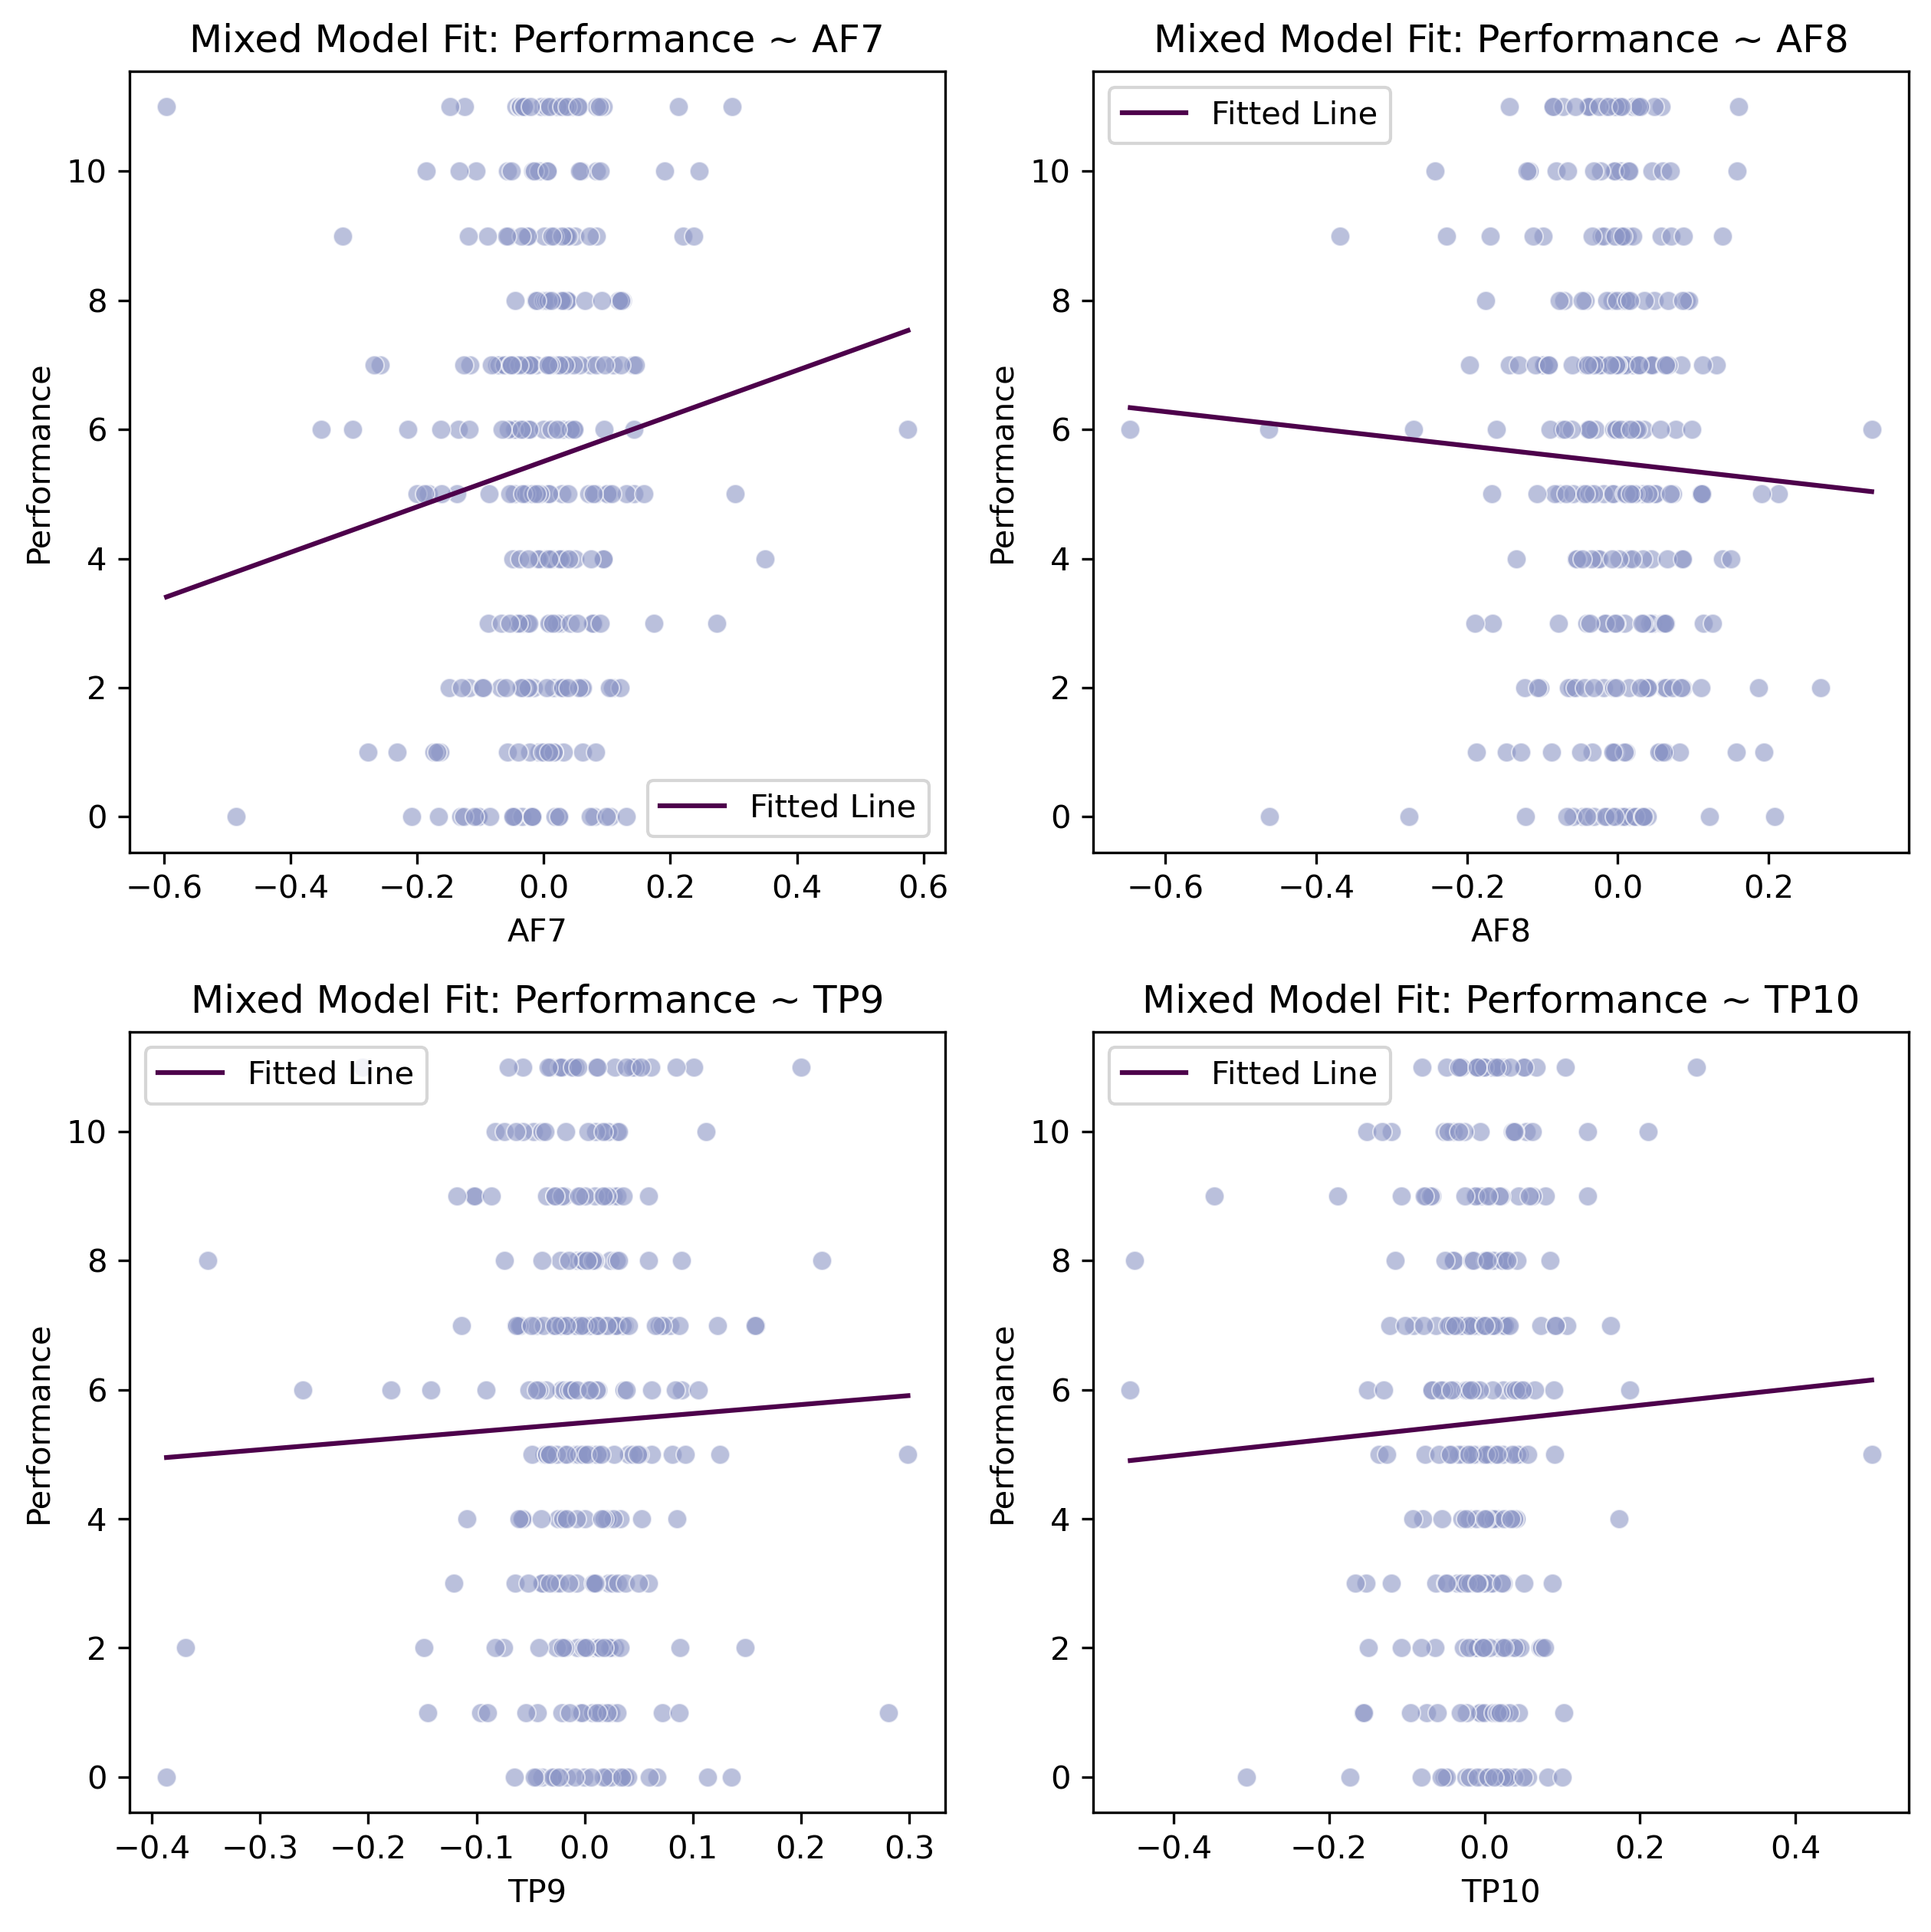

In [16]:
# Plot the mixed model of electrode on performance

# Prepare the grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5), dpi=300)  # Adjust figsize to 8.5 x 8.5 inches

electrodes = ['AF7', 'AF8', 'TP9', 'TP10']

for i, electrode in enumerate(electrodes):
    # Fit the model for the current electrode
    model = smf.mixedlm(f"Performance ~ {electrode}", data=corr_df_clean_electrodes_performance, groups=corr_df_clean_electrodes_performance["subj"], re_formula="1",
                        vc_formula={"ses": "0 + C(ses)"}).fit()
    
    # Get predicted values for a range of electrode values
    electrode_values = np.linspace(corr_df_clean_electrodes_performance[electrode].min(), corr_df_clean_electrodes_performance[electrode].max(), 100)
    predicted_performance = model.params['Intercept'] + model.params[electrode] * electrode_values
    
    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plot the observed data using the specified color
    sns.scatterplot(x=electrode, y='Performance', data=corr_df_clean_electrodes_performance, color='#8c96c6', alpha=0.6, ax=ax)
    
    # Plot the fitted line using the specified color
    ax.plot(electrode_values, predicted_performance, color='#4d004b', label='Fitted Line')
    
    # Set titles and labels
    ax.set_xlabel(electrode)
    ax.set_ylabel('Performance')
    ax.set_title(f'Mixed Model Fit: Performance ~ {electrode}')
    ax.legend()

# Ensure the background of the figure is white
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('plots/model_fits_performance.png', format='png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')  # Save the figure
plt.show()


In [17]:
# Now fit the same model for time

# Fit a complex mixed model that deals with sessions nested within sujects
# This model:
    # "Performance ~ Electrode" defines "Performance" as the DV and"AF7" as an independent variable (fixed effect)
    # groups=corr_df["subj"] specifies that the random intercepts should vary by "subj" to account for the non-independence of observations within subjects
    #re_formula="1" indicates that there is a random intercept for each subject
    # vc_formula={"ses": "0 + C(ses)"} specifies a variance component for "ses", treating sessions as a categorical variable (with C(ses)) and allowing for varying intercepts by "ses" without a slope
# This may not converge, so we fit simpler models below

# Define the models
model_af7 = smf.mixedlm("Time ~ AF7", data=corr_df_clean_electrodes_time, groups=corr_df_clean_electrodes_time["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_af8 = smf.mixedlm("Time ~ AF8", data=corr_df_clean_electrodes_time, groups=corr_df_clean_electrodes_time["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp9 = smf.mixedlm("Time ~ TP9", data=corr_df_clean_electrodes_time, groups=corr_df_clean_electrodes_time["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp10 = smf.mixedlm("Time ~ TP10", data=corr_df_clean_electrodes_time, groups=corr_df_clean_electrodes_time["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

# Fit the model
results_af7 = model_af7.fit()
results_af8 = model_af8.fit()
results_tp9 = model_tp9.fit()
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_af7.summary())
print(results_af8.summary())
print(results_tp9.summary())
print(results_tp10.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Time      
No. Observations:  285     Method:             REML      
No. Groups:        142     Scale:              15496.6678
Min. group size:   1       Log-Likelihood:     -1914.2831
Max. group size:   3       Converged:          Yes       
Mean group size:   2.0                                   
---------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   423.658   14.433 29.354 0.000 395.371 451.946
AF7         194.225  106.257  1.828 0.068 -14.035 402.485
Group Var 11998.905                                      
ses Var   17373.231                                      

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Time      
No. Observations:   285     Method:             REML      
No. Groups:         142     Sca

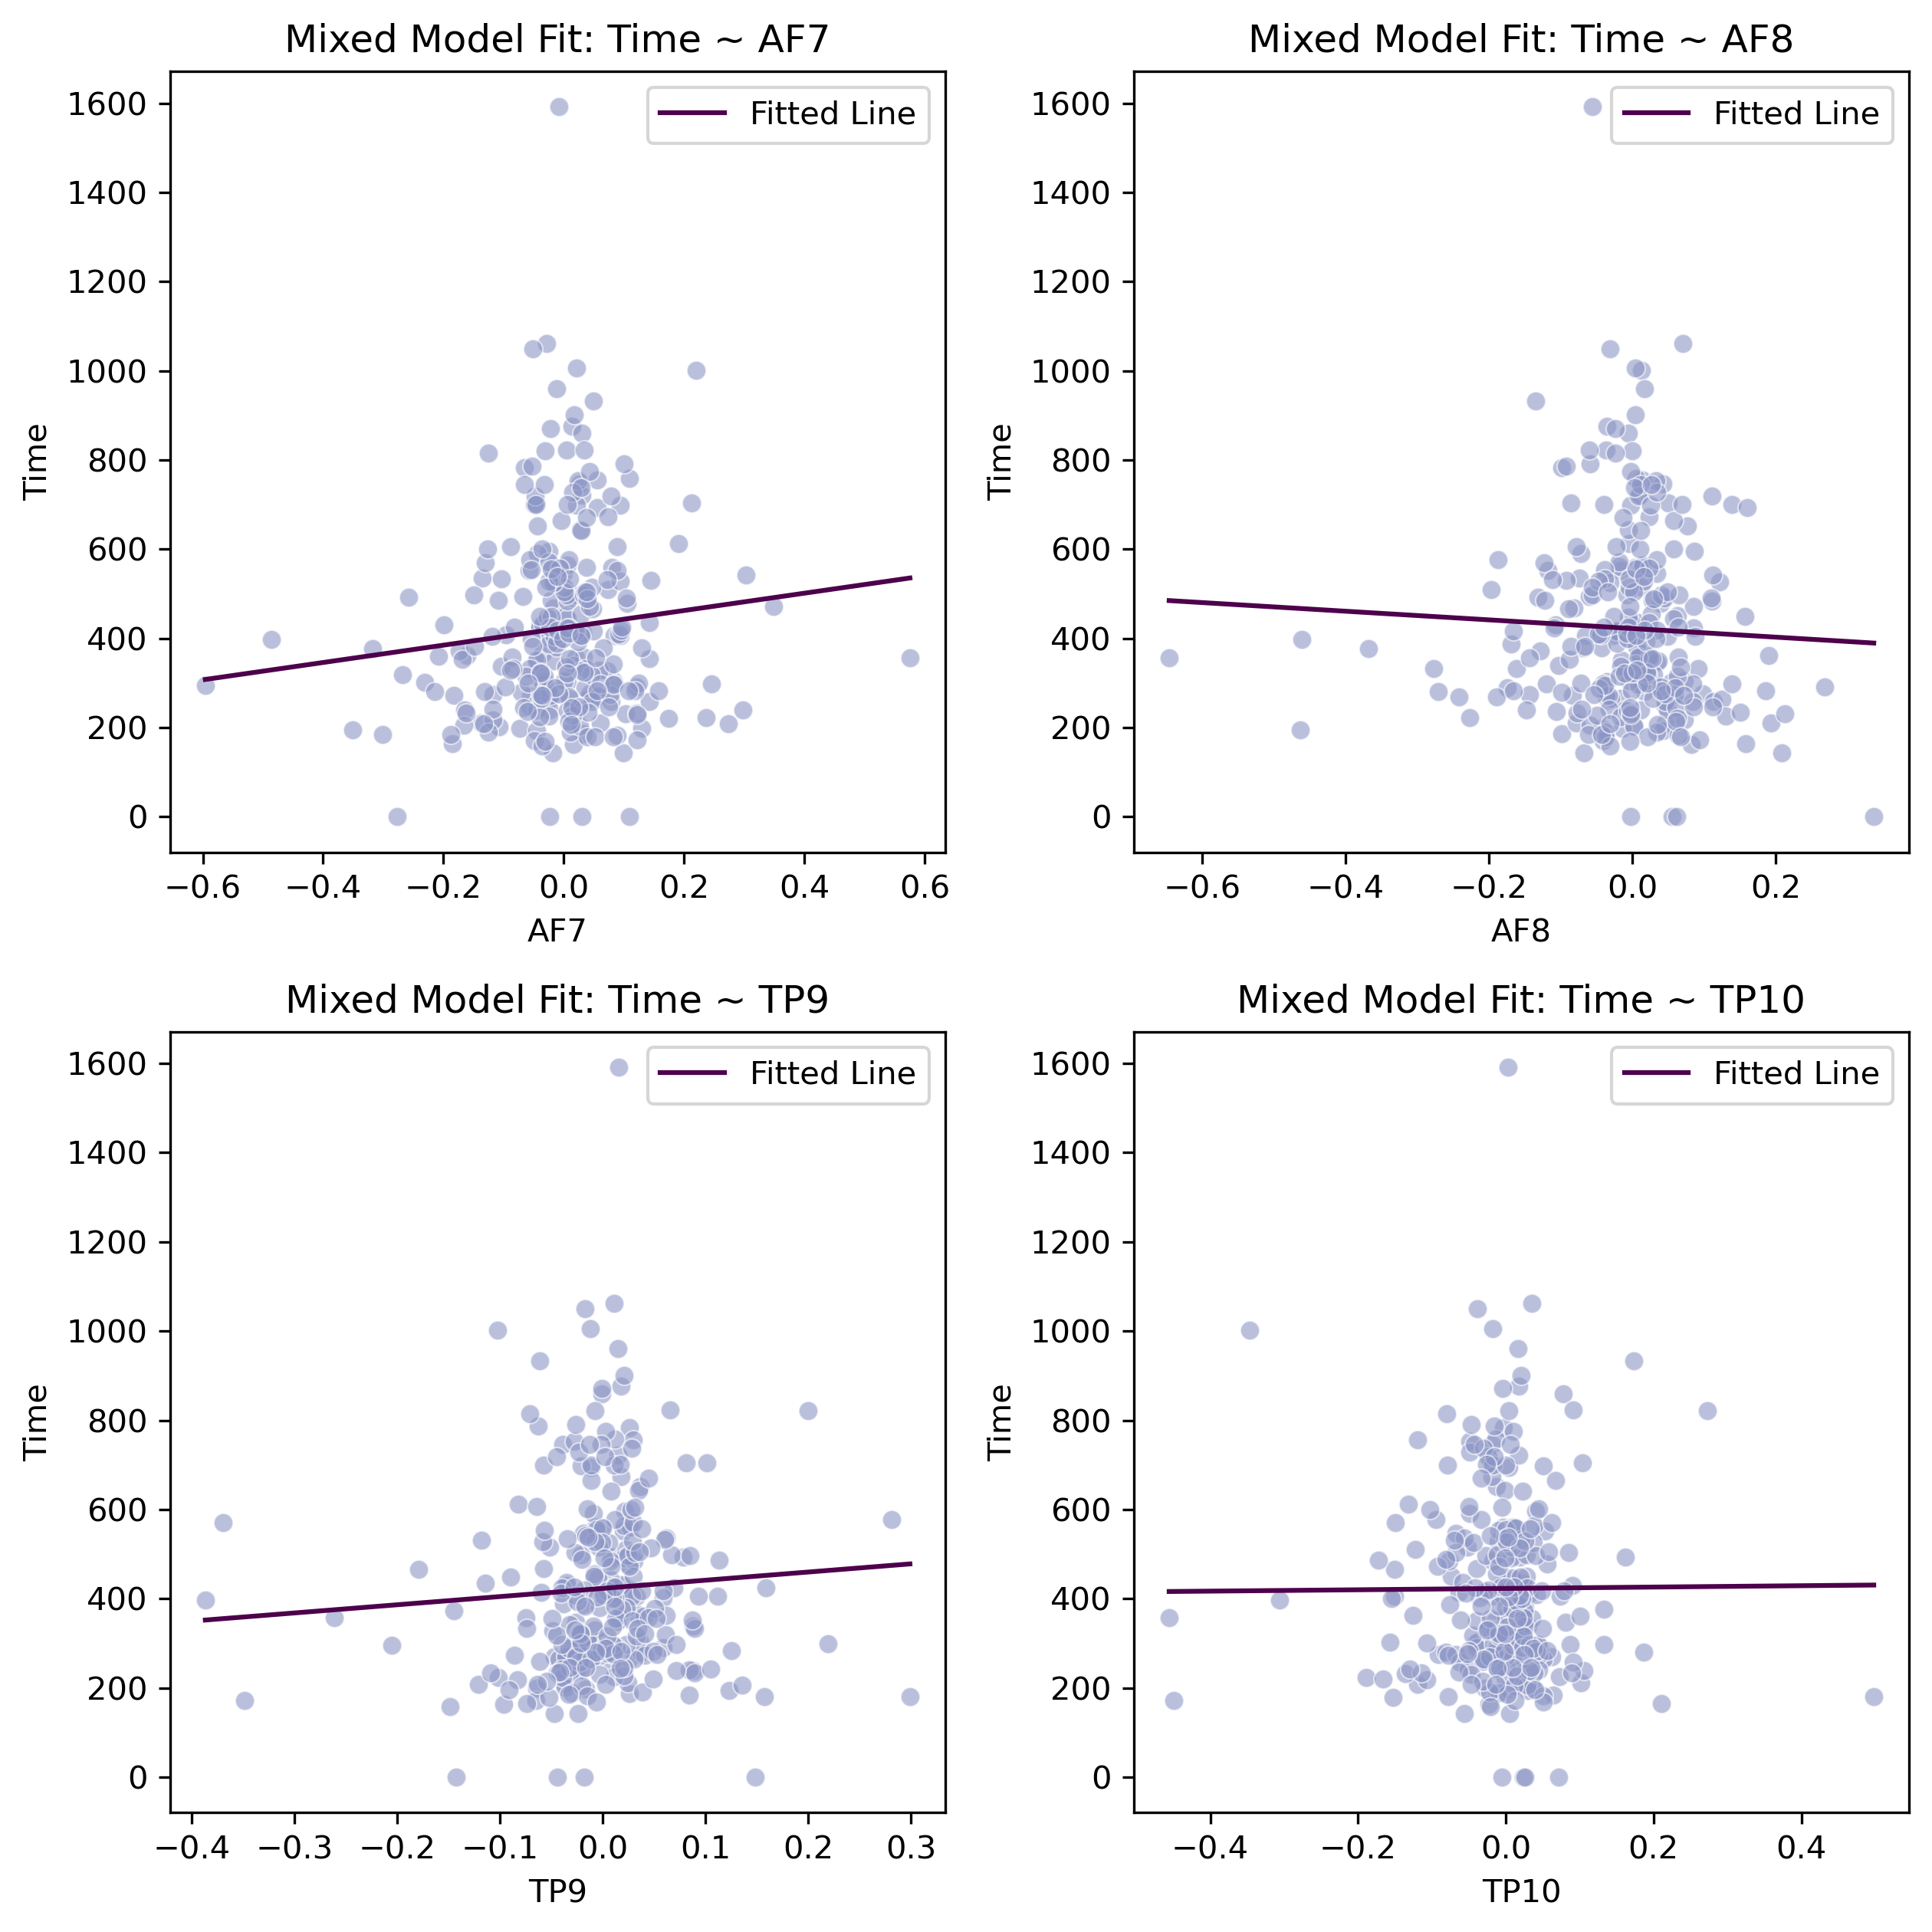

In [18]:
# Plot the mixed model of electrode on time

# Prepare the grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5), dpi=300)  # Adjust figsize to 8.5 x 8.5 inches

electrodes = ['AF7', 'AF8', 'TP9', 'TP10']

for i, electrode in enumerate(electrodes):
    # Fit the model for the current electrode
    model = smf.mixedlm(f"Time ~ {electrode}", data=corr_df_clean_electrodes_time, groups=corr_df_clean_electrodes_time["subj"], re_formula="1",
                        vc_formula={"ses": "0 + C(ses)"}).fit()
    
    # Get predicted values for a range of electrode values
    electrode_values = np.linspace(corr_df_clean_electrodes_time[electrode].min(), corr_df_clean_electrodes_time[electrode].max(), 100)
    predicted_performance = model.params['Intercept'] + model.params[electrode] * electrode_values
    
    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plot the observed data using the specified color
    sns.scatterplot(x=electrode, y='Time', data=corr_df_clean_electrodes_time, color='#8c96c6', alpha=0.6, ax=ax)
    
    # Plot the fitted line using the specified color
    ax.plot(electrode_values, predicted_performance, color='#4d004b', label='Fitted Line')
    
    # Set titles and labels
    ax.set_xlabel(electrode)
    ax.set_ylabel('Time')
    ax.set_title(f'Mixed Model Fit: Time ~ {electrode}')
    ax.legend()

# Ensure the background of the figure is white
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('plots/model_fits_time.png', format='png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')  # Save the figure
plt.show()


In [19]:
# Now fit the same model for average cognitive trust

# Fit a complex mixed model that deals with sessions nested within sujects
# This model:
    # "Cognitive Trust ~ Electrode" defines "Cognitive Trust" as the DV and"AF7" as an independent variable (fixed effect)
    # groups=corr_df["subj"] specifies that the random intercepts should vary by "subj" to account for the non-independence of observations within subjects
    #re_formula="1" indicates that there is a random intercept for each subject
    # vc_formula={"ses": "0 + C(ses)"} specifies a variance component for "ses", treating sessions as a categorical variable (with C(ses)) and allowing for varying intercepts by "ses" without a slope
# This may not converge, so we fit simpler models below

# Define the models
model_af7 = smf.mixedlm("cognitive_trust ~ AF7", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_af8 = smf.mixedlm("cognitive_trust ~ AF8", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp9 = smf.mixedlm("cognitive_trust ~ TP9", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp10 = smf.mixedlm("cognitive_trust ~ TP10", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

# Fit the model
results_af7 = model_af7.fit()
results_af8 = model_af8.fit()
results_tp9 = model_tp9.fit()
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_af7.summary())
print(results_af8.summary())
print(results_tp9.summary())
print(results_tp10.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: cognitive_trust
No. Observations: 203     Method:             REML           
No. Groups:       113     Scale:              0.0374         
Min. group size:  1       Log-Likelihood:     -71.3921       
Max. group size:  3       Converged:          Yes            
Mean group size:  1.8                                        
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept      3.891     0.033  119.469  0.000   3.827   3.955
AF7           -0.361     0.182   -1.976  0.048  -0.718  -0.003
Group Var      0.083                                          
ses Var        0.021                                          

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: cognitive_trust
No. Observations: 203   

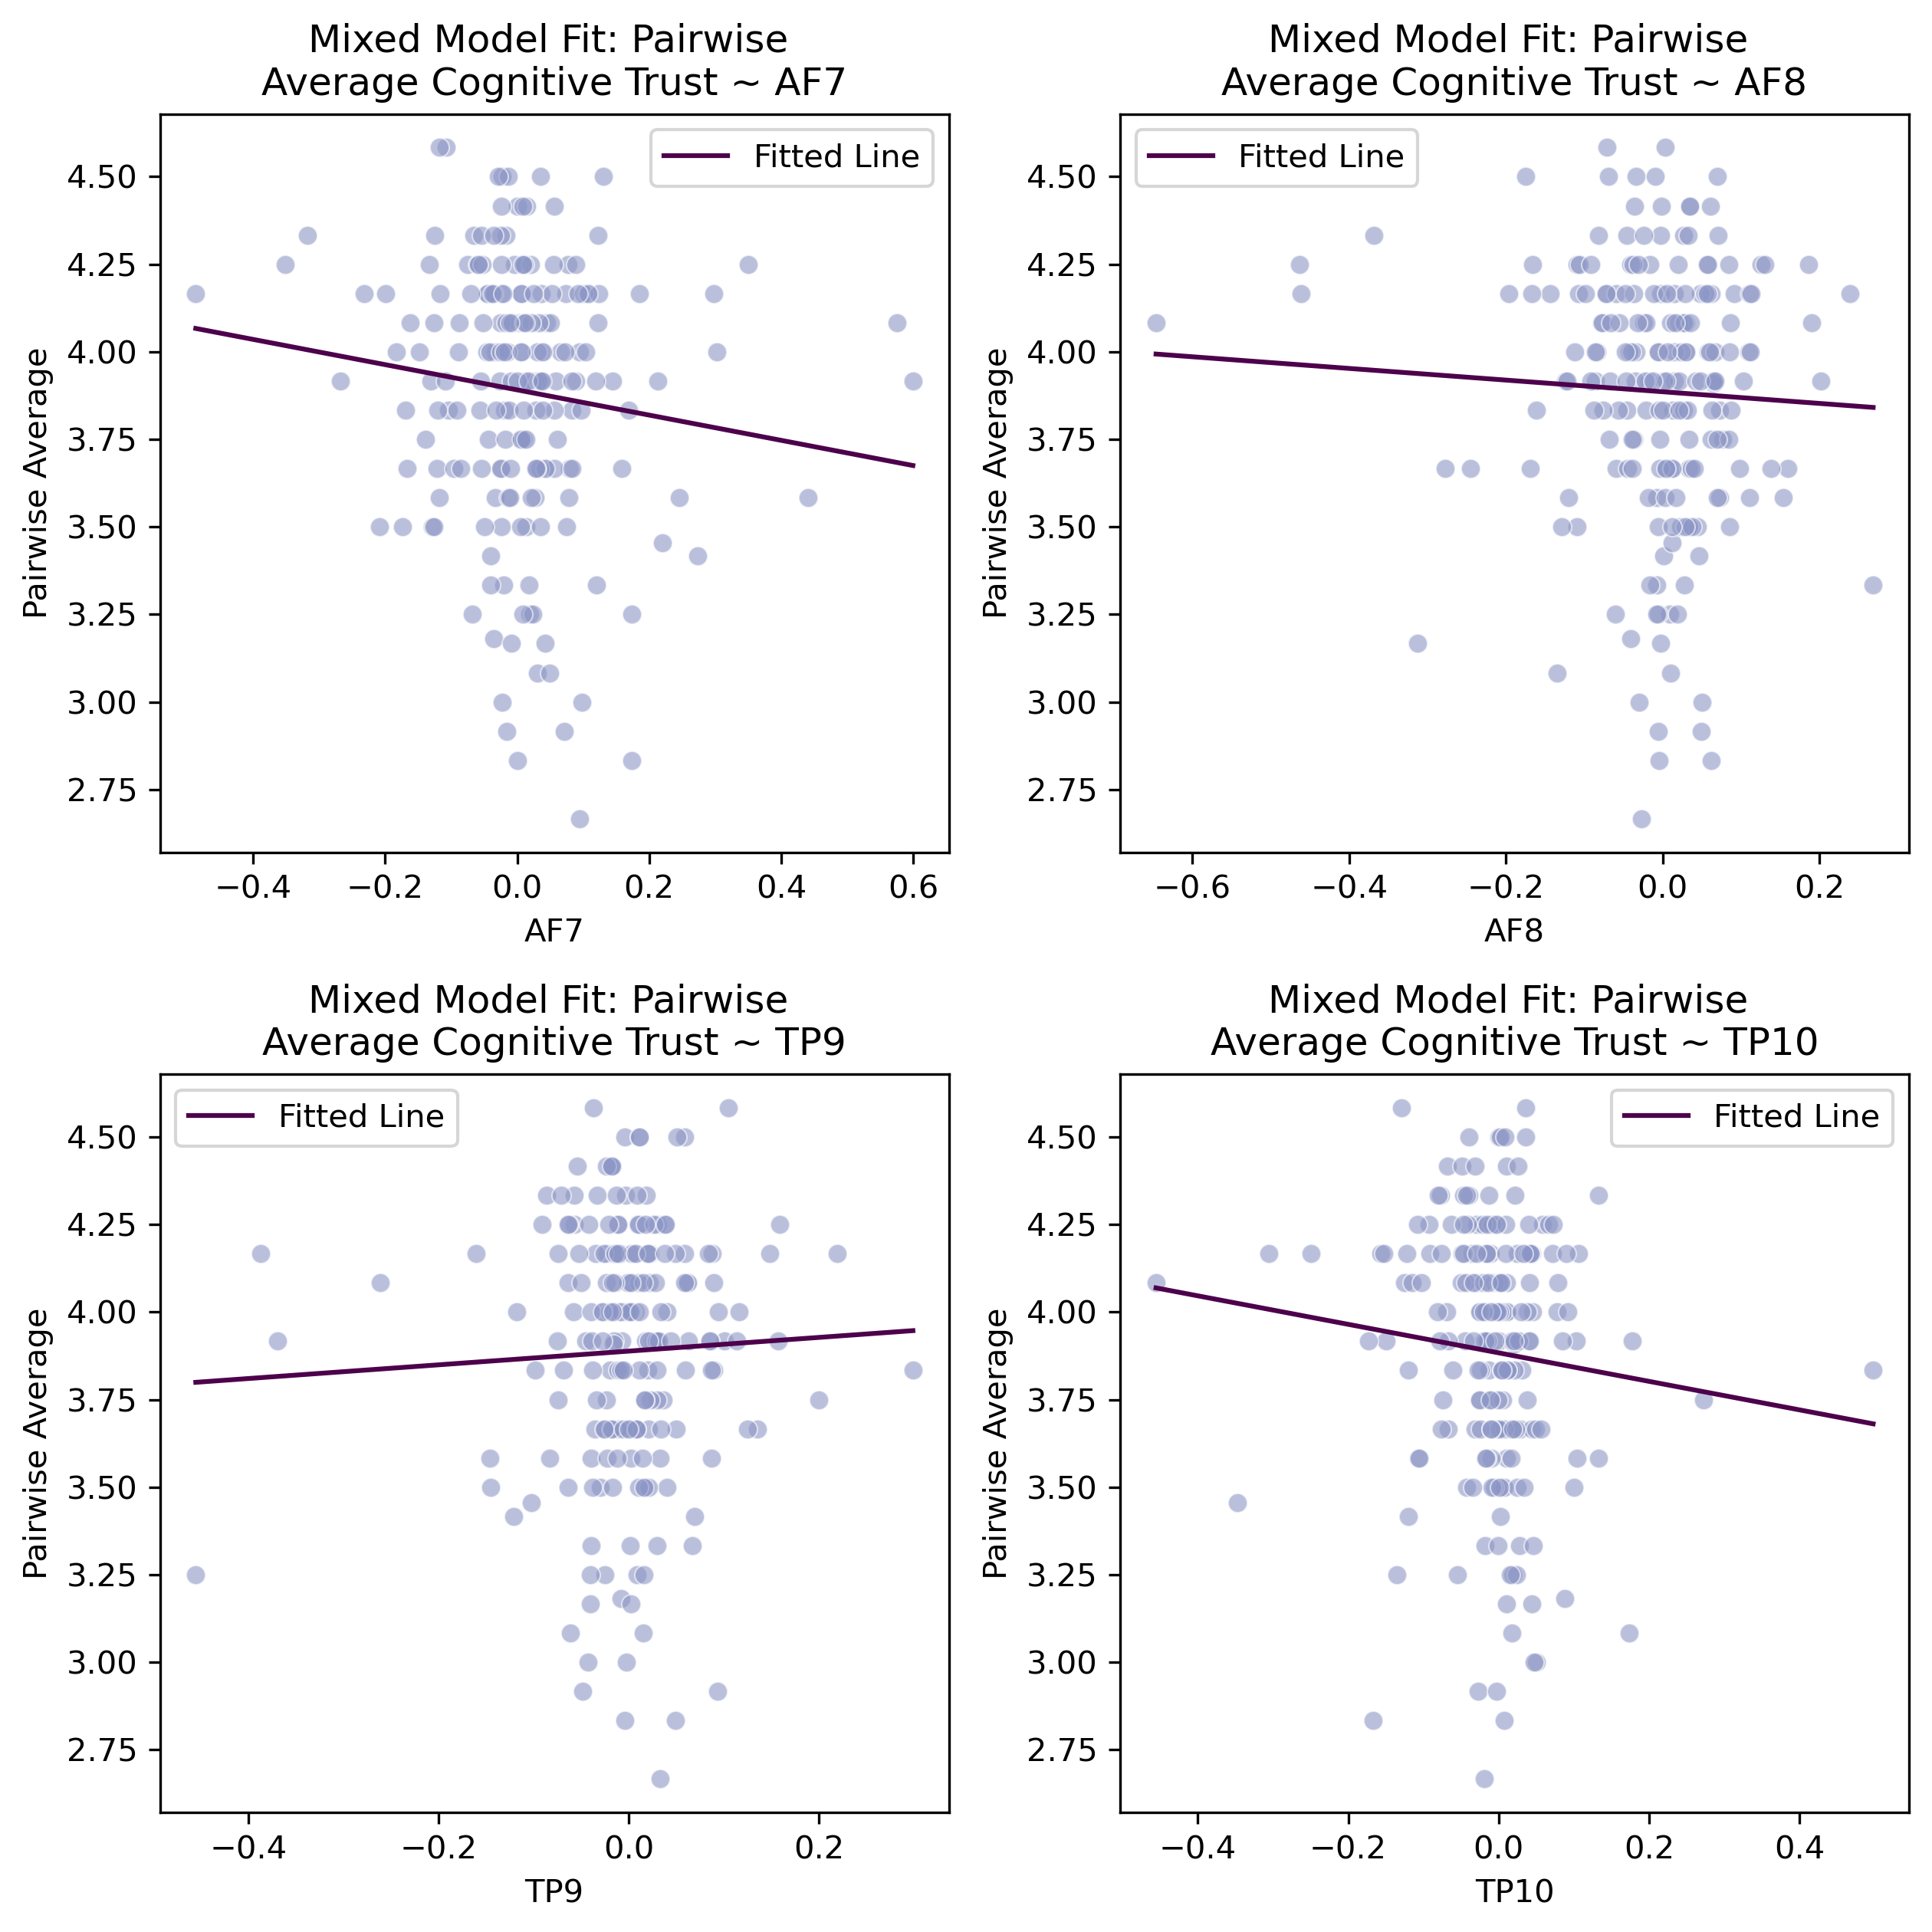

In [20]:
# Plot the mixed model of electrode on average cognitive_trust

# Prepare the grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5), dpi=300)  # Adjust figsize to 8.5 x 8.5 inches

electrodes = ['AF7', 'AF8', 'TP9', 'TP10']

for i, electrode in enumerate(electrodes):
    # Fit the model for the current electrode
    model = smf.mixedlm(f"cognitive_trust ~ {electrode}", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"], re_formula="1",
                        vc_formula={"ses": "0 + C(ses)"}).fit()
    
    # Get predicted values for a range of electrode values
    electrode_values = np.linspace(corr_df_clean_trust[electrode].min(), corr_df_clean_trust[electrode].max(), 100)
    predicted_performance = model.params['Intercept'] + model.params[electrode] * electrode_values
    
    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plot the observed data using the specified color
    sns.scatterplot(x=electrode, y='cognitive_trust', data=corr_df_clean_trust, color='#8c96c6', alpha=0.6, ax=ax)
    
    # Plot the fitted line using the specified color
    ax.plot(electrode_values, predicted_performance, color='#4d004b', label='Fitted Line')
    
    # Set titles and labels
    ax.set_xlabel(electrode)
    ax.set_ylabel('Pairwise Average')
    ax.set_title(f'Mixed Model Fit: Pairwise \nAverage Cognitive Trust ~ {electrode}')
    ax.legend()

# Ensure the background of the figure is white
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('plots/model_fits_average_cognitive_trust.png', format='png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')  # Save the figure
plt.show()


In [21]:
# Now fit the same model for average affective trust

# Fit a complex mixed model that deals with sessions nested within sujects
# This model:
    # "Cognitive Trust ~ Electrode" defines "Cognitive Trust" as the DV and"AF7" as an independent variable (fixed effect)
    # groups=corr_df["subj"] specifies that the random intercepts should vary by "subj" to account for the non-independence of observations within subjects
    #re_formula="1" indicates that there is a random intercept for each subject
    # vc_formula={"ses": "0 + C(ses)"} specifies a variance component for "ses", treating sessions as a categorical variable (with C(ses)) and allowing for varying intercepts by "ses" without a slope
# This may not converge, so we fit simpler models below

# Define the models
model_af7 = smf.mixedlm("affective_trust ~ AF7", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_af8 = smf.mixedlm("affective_trust ~ AF8", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp9 = smf.mixedlm("affective_trust ~ TP9", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp10 = smf.mixedlm("affective_trust ~ TP10", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

# Fit the model
results_af7 = model_af7.fit()
results_af8 = model_af8.fit()
results_tp9 = model_tp9.fit()
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_af7.summary())
print(results_af8.summary())
print(results_tp9.summary())
print(results_tp10.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: affective_trust
No. Observations: 203     Method:             REML           
No. Groups:       113     Scale:              0.0619         
Min. group size:  1       Log-Likelihood:     -136.5691      
Max. group size:  3       Converged:          Yes            
Mean group size:  1.8                                        
--------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept       3.533     0.054  65.920  0.000   3.428   3.638
AF7            -0.430     0.223  -1.927  0.054  -0.867   0.007
Group Var       0.277                                         
ses Var         0.011                                         

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: affective_trust
No. Observations: 203   

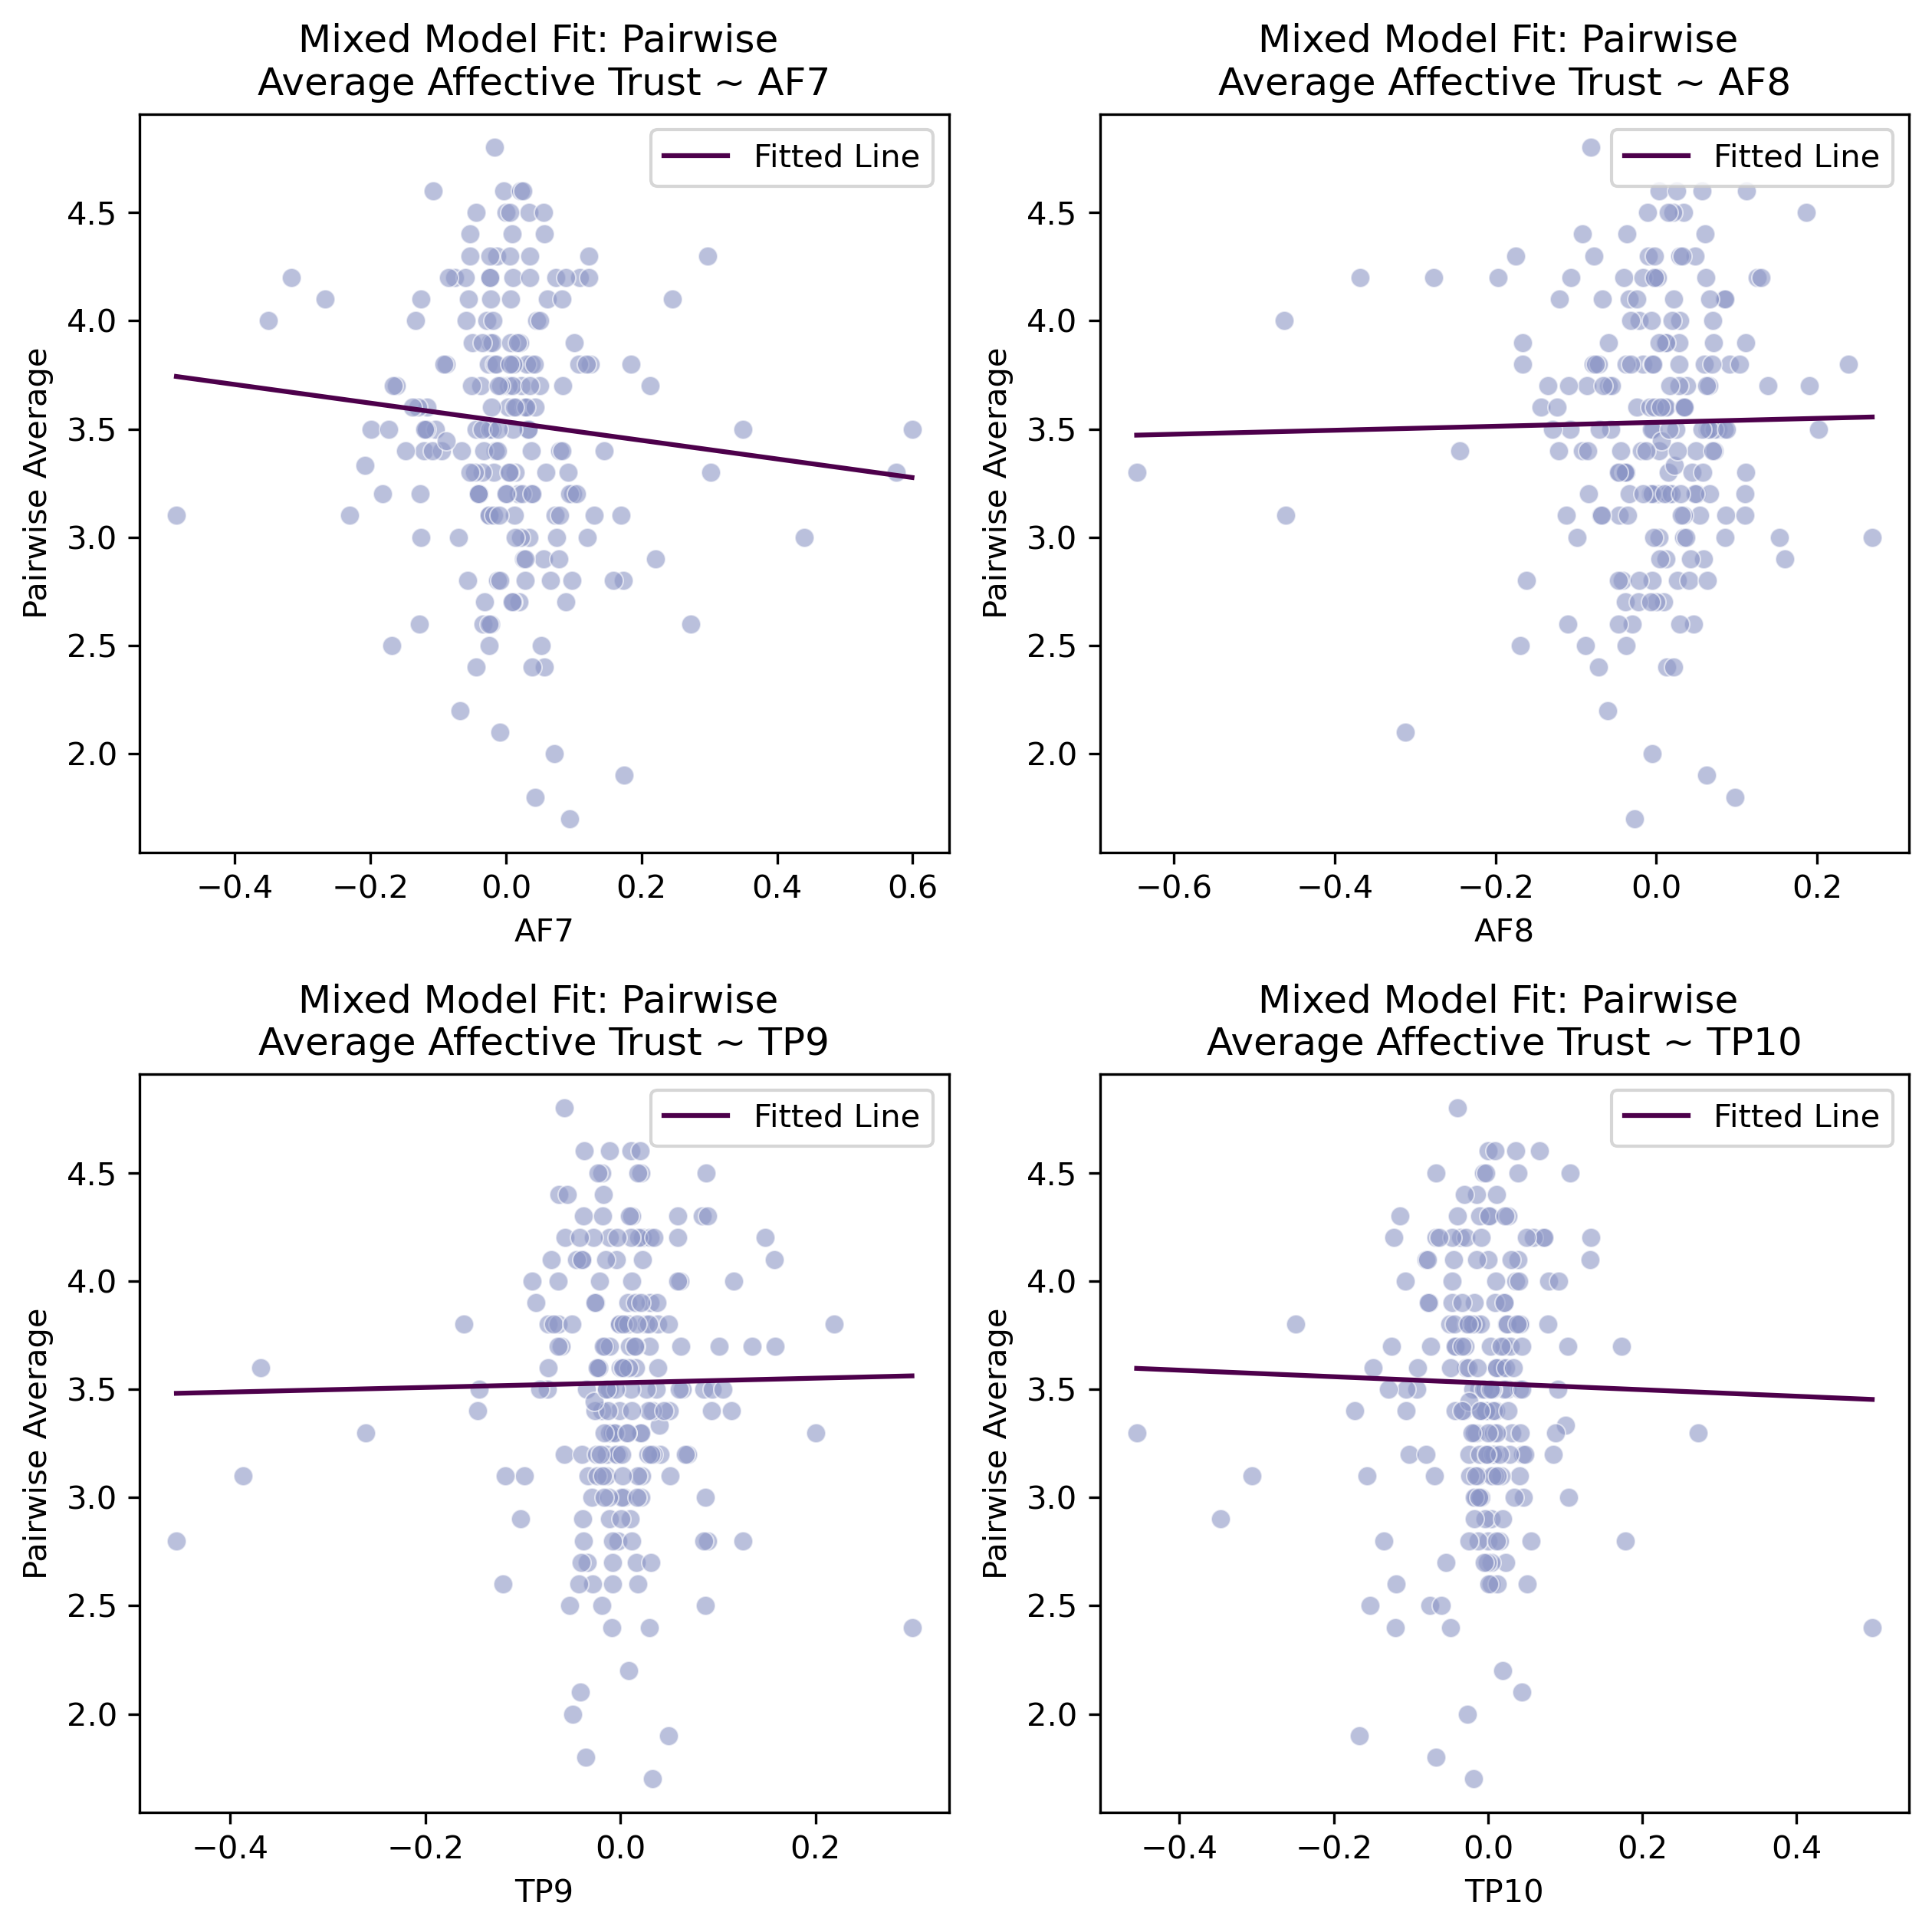

In [22]:
# Plot the mixed model of electrode on average affective_trust

# Prepare the grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5), dpi=300)  # Adjust figsize to 8.5 x 8.5 inches

electrodes = ['AF7', 'AF8', 'TP9', 'TP10']

for i, electrode in enumerate(electrodes):
    # Fit the model for the current electrode
    model = smf.mixedlm(f"affective_trust ~ {electrode}", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"], re_formula="1",
                        vc_formula={"ses": "0 + C(ses)"}).fit()
    
    # Get predicted values for a range of electrode values
    electrode_values = np.linspace(corr_df_clean_trust[electrode].min(), corr_df_clean_trust[electrode].max(), 100)
    predicted_performance = model.params['Intercept'] + model.params[electrode] * electrode_values
    
    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plot the observed data using the specified color
    sns.scatterplot(x=electrode, y='affective_trust', data=corr_df_clean_trust, color='#8c96c6', alpha=0.6, ax=ax)
    
    # Plot the fitted line using the specified color
    ax.plot(electrode_values, predicted_performance, color='#4d004b', label='Fitted Line')
    
    # Set titles and labels
    ax.set_xlabel(electrode)
    ax.set_ylabel('Pairwise Average')
    ax.set_title(f'Mixed Model Fit: Pairwise \nAverage Affective Trust ~ {electrode}')
    ax.legend()

# Ensure the background of the figure is white
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('plots/model_fits_average_affective_trust.png', format='png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')  # Save the figure
plt.show()

In [23]:
# Now fit the same model for pairwise cognitive trust correlations

# Fit a complex mixed model that deals with sessions nested within sujects
# This model:
    # "Cognitive Trust ~ Electrode" defines "Cognitive Trust" as the DV and"AF7" as an independent variable (fixed effect)
    # groups=corr_df["subj"] specifies that the random intercepts should vary by "subj" to account for the non-independence of observations within subjects
    #re_formula="1" indicates that there is a random intercept for each subject
    # vc_formula={"ses": "0 + C(ses)"} specifies a variance component for "ses", treating sessions as a categorical variable (with C(ses)) and allowing for varying intercepts by "ses" without a slope
# This may not converge, so we fit simpler models below

# Define the models
model_af7 = smf.mixedlm("cognitivetrust_corr ~ AF7", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_af8 = smf.mixedlm("cognitivetrust_corr ~ AF8", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp9 = smf.mixedlm("cognitivetrust_corr ~ TP9", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp10 = smf.mixedlm("cognitivetrust_corr ~ TP10", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

# Fit the model
results_af7 = model_af7.fit()
results_af8 = model_af8.fit()
results_tp9 = model_tp9.fit()
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_af7.summary())
print(results_af8.summary())
print(results_tp9.summary())
print(results_tp10.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: cognitivetrust_corr
No. Observations: 203     Method:             REML               
No. Groups:       113     Scale:              0.0742             
Min. group size:  1       Log-Likelihood:     -134.8170          
Max. group size:  3       Converged:          Yes                
Mean group size:  1.8                                            
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|    [0.025    0.975]
--------------------------------------------------------------------
Intercept    0.411       0.041    9.907    0.000     0.330     0.492
AF7          0.055       0.259    0.214    0.830    -0.452     0.563
Group Var    0.113                                                  
ses Var      0.057                                                  

              Mixed Linear Model Regression Results
Model:          

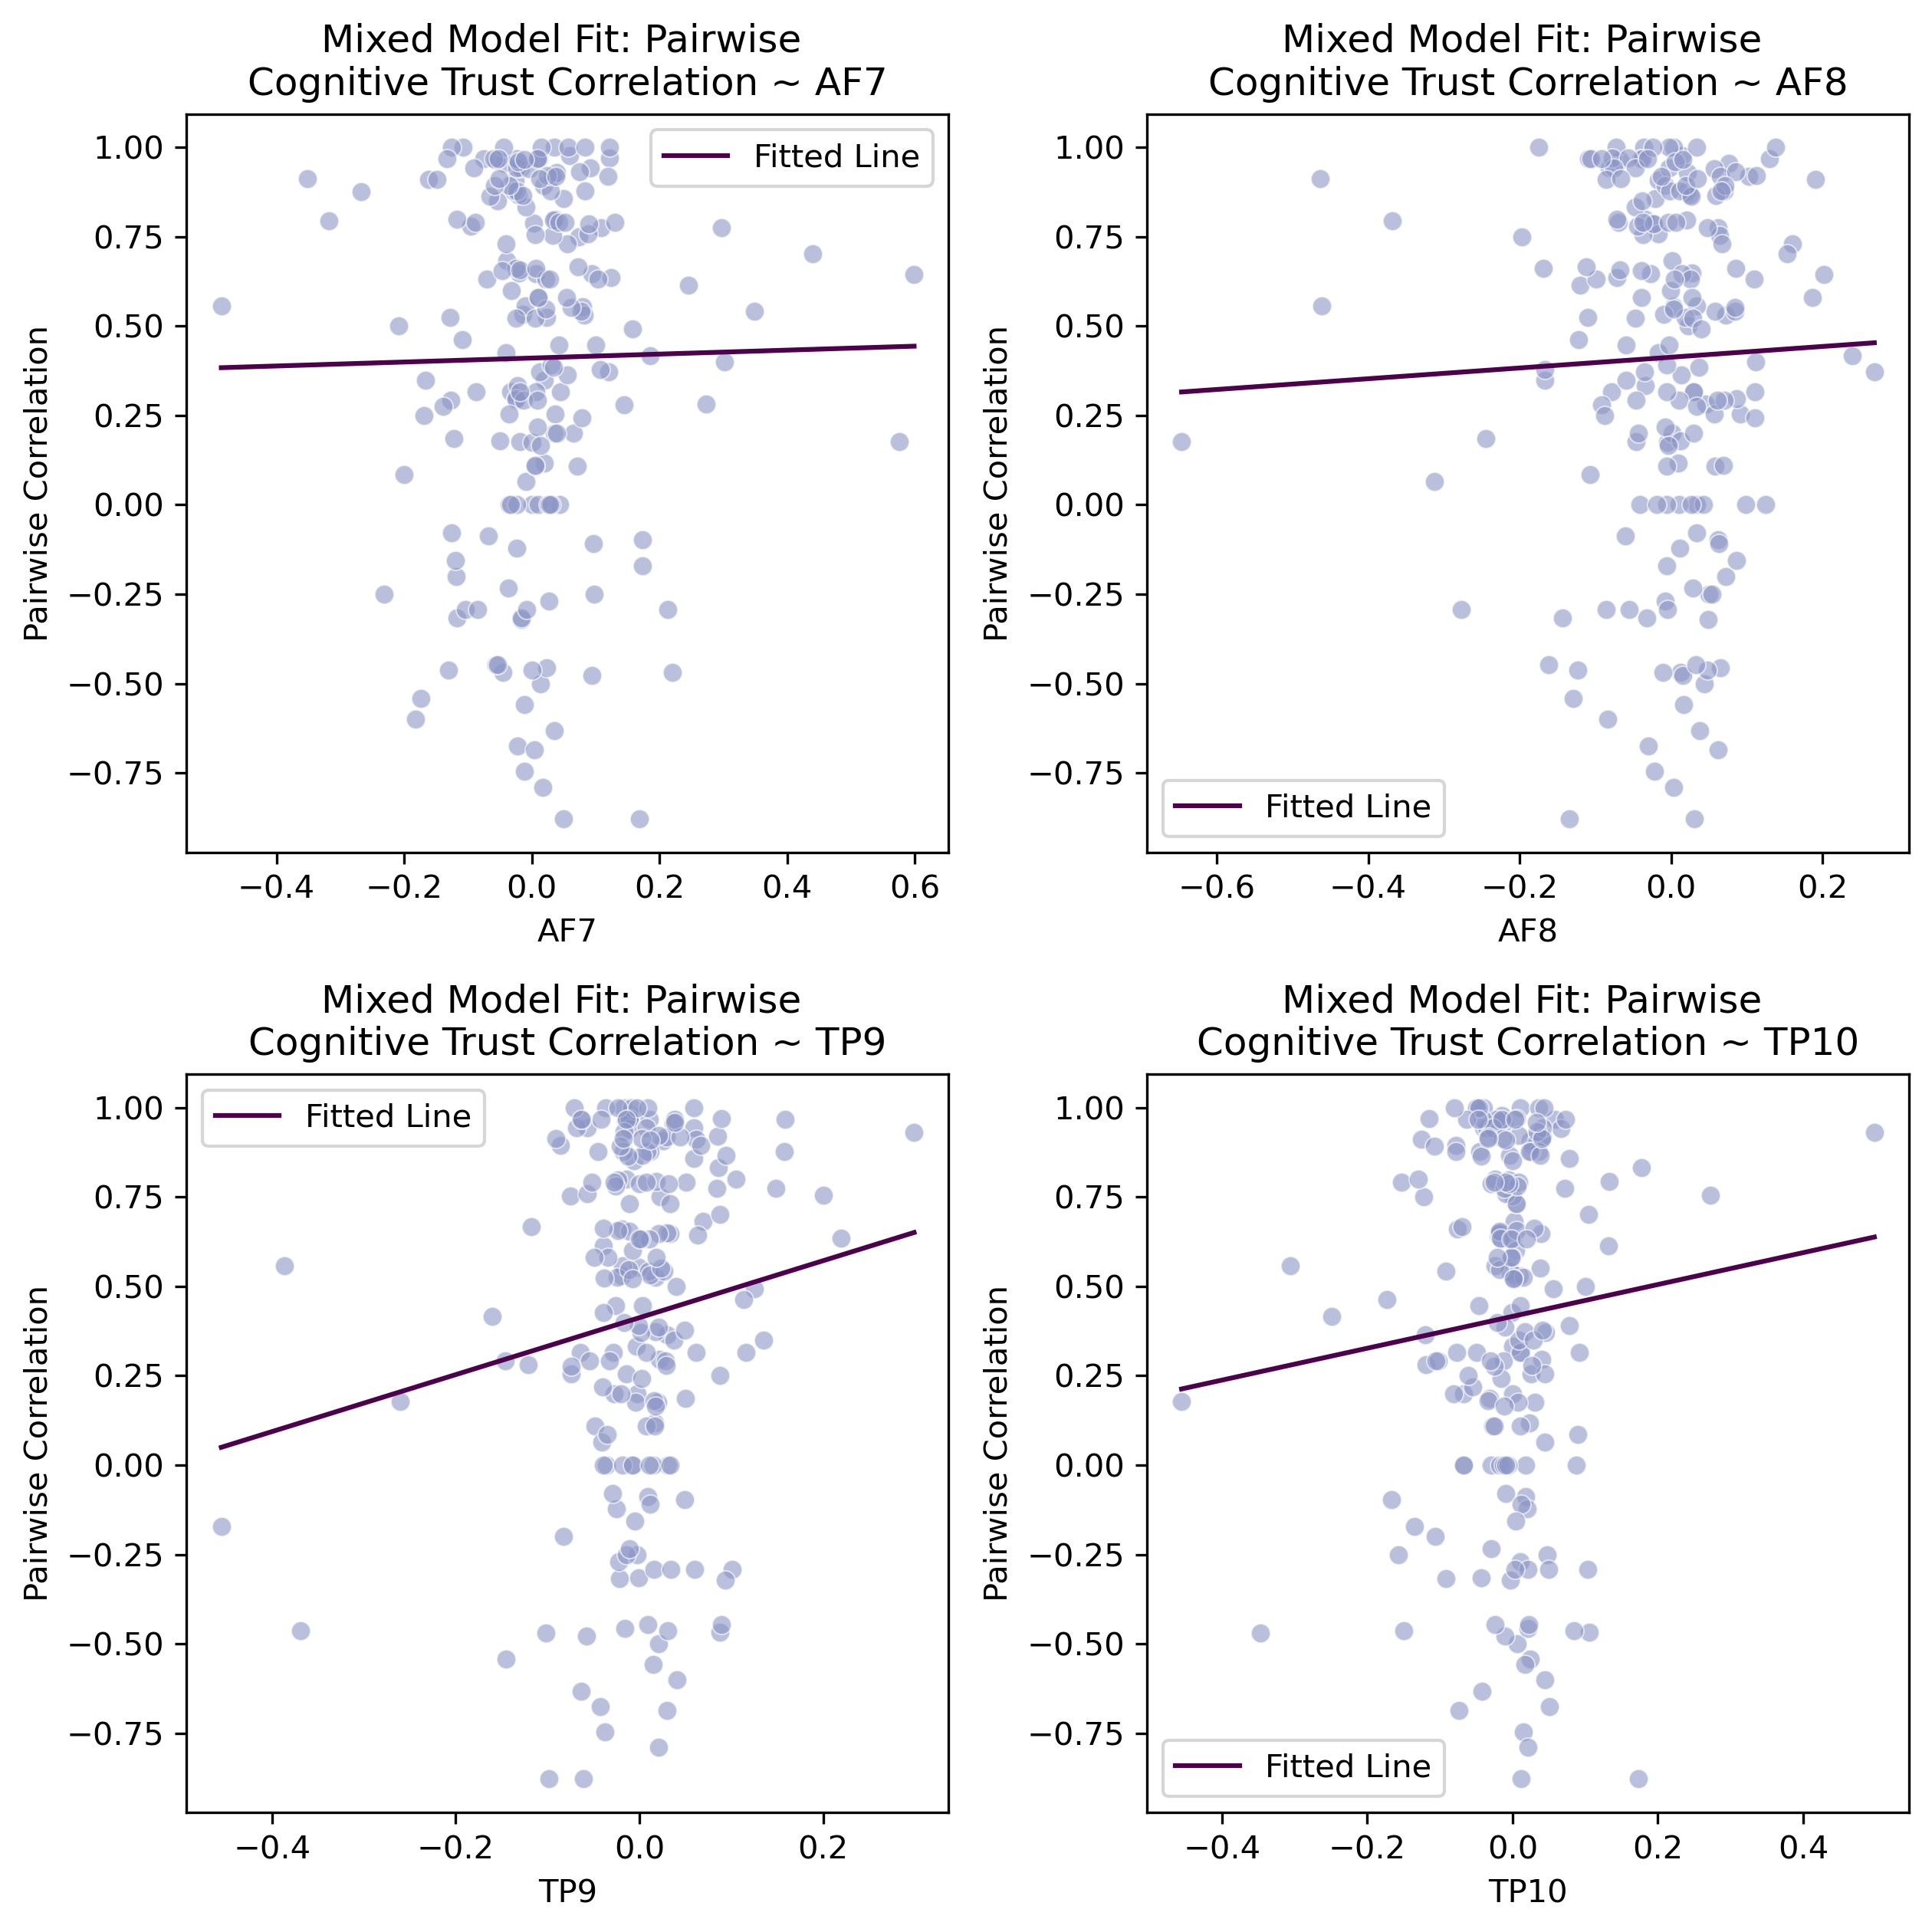

In [24]:
# Plot the mixed model of electrode on pairwise cognitive_trust correlation

# Prepare the grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5), dpi=300)  # Adjust figsize to 8.5 x 8.5 inches

electrodes = ['AF7', 'AF8', 'TP9', 'TP10']

for i, electrode in enumerate(electrodes):
    # Fit the model for the current electrode
    model = smf.mixedlm(f"cognitivetrust_corr ~ {electrode}", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"], re_formula="1",
                        vc_formula={"ses": "0 + C(ses)"}).fit()
    
    # Get predicted values for a range of electrode values
    electrode_values = np.linspace(corr_df_clean_trust[electrode].min(), corr_df_clean_trust[electrode].max(), 100)
    predicted_performance = model.params['Intercept'] + model.params[electrode] * electrode_values
    
    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plot the observed data using the specified color
    sns.scatterplot(x=electrode, y='cognitivetrust_corr', data=corr_df_clean_trust, color='#8c96c6', alpha=0.6, ax=ax)
    
    # Plot the fitted line using the specified color
    ax.plot(electrode_values, predicted_performance, color='#4d004b', label='Fitted Line')
    
    # Set titles and labels
    ax.set_xlabel(electrode)
    ax.set_ylabel('Pairwise Correlation')
    ax.set_title(f'Mixed Model Fit: Pairwise \nCognitive Trust Correlation ~ {electrode}')
    ax.legend()

# Ensure the background of the figure is white
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('plots/model_fits_pairwise_cognitive_trust_correlation.png', format='png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')  # Save the figure
plt.show()


In [25]:
# NOTE: AF8 MODEL IS SINGULAR!!!

# Now fit the same model for pairwise affective trust correlations

# Fit a complex mixed model that deals with sessions nested within sujects
# This model:
    # "Cognitive Trust ~ Electrode" defines "Cognitive Trust" as the DV and"AF7" as an independent variable (fixed effect)
    # groups=corr_df["subj"] specifies that the random intercepts should vary by "subj" to account for the non-independence of observations within subjects
    #re_formula="1" indicates that there is a random intercept for each subject
    # vc_formula={"ses": "0 + C(ses)"} specifies a variance component for "ses", treating sessions as a categorical variable (with C(ses)) and allowing for varying intercepts by "ses" without a slope
# This may not converge, so we fit simpler models below

# Define the models
model_af7 = smf.mixedlm("affecttrust_corr ~ AF7", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_af8 = smf.mixedlm("affecttrust_corr ~ AF8", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp9 = smf.mixedlm("affecttrust_corr ~ TP9", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp10 = smf.mixedlm("affecttrust_corr ~ TP10", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

# Fit the model
results_af7 = model_af7.fit()
results_af8 = model_af8.fit()
results_tp9 = model_tp9.fit()
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_af7.summary())
print(results_af8.summary())
print(results_tp9.summary())
print(results_tp10.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: affecttrust_corr
No. Observations: 203     Method:             REML            
No. Groups:       113     Scale:              0.0947          
Min. group size:  1       Log-Likelihood:     -152.8011       
Max. group size:  3       Converged:          Yes             
Mean group size:  1.8                                         
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept     0.052      0.038   1.387   0.165   -0.022    0.127
AF7           0.351      0.292   1.202   0.229   -0.221    0.923
Group Var     0.027                                             
ses Var       0.139                                             

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: affecttrust_corr
No.

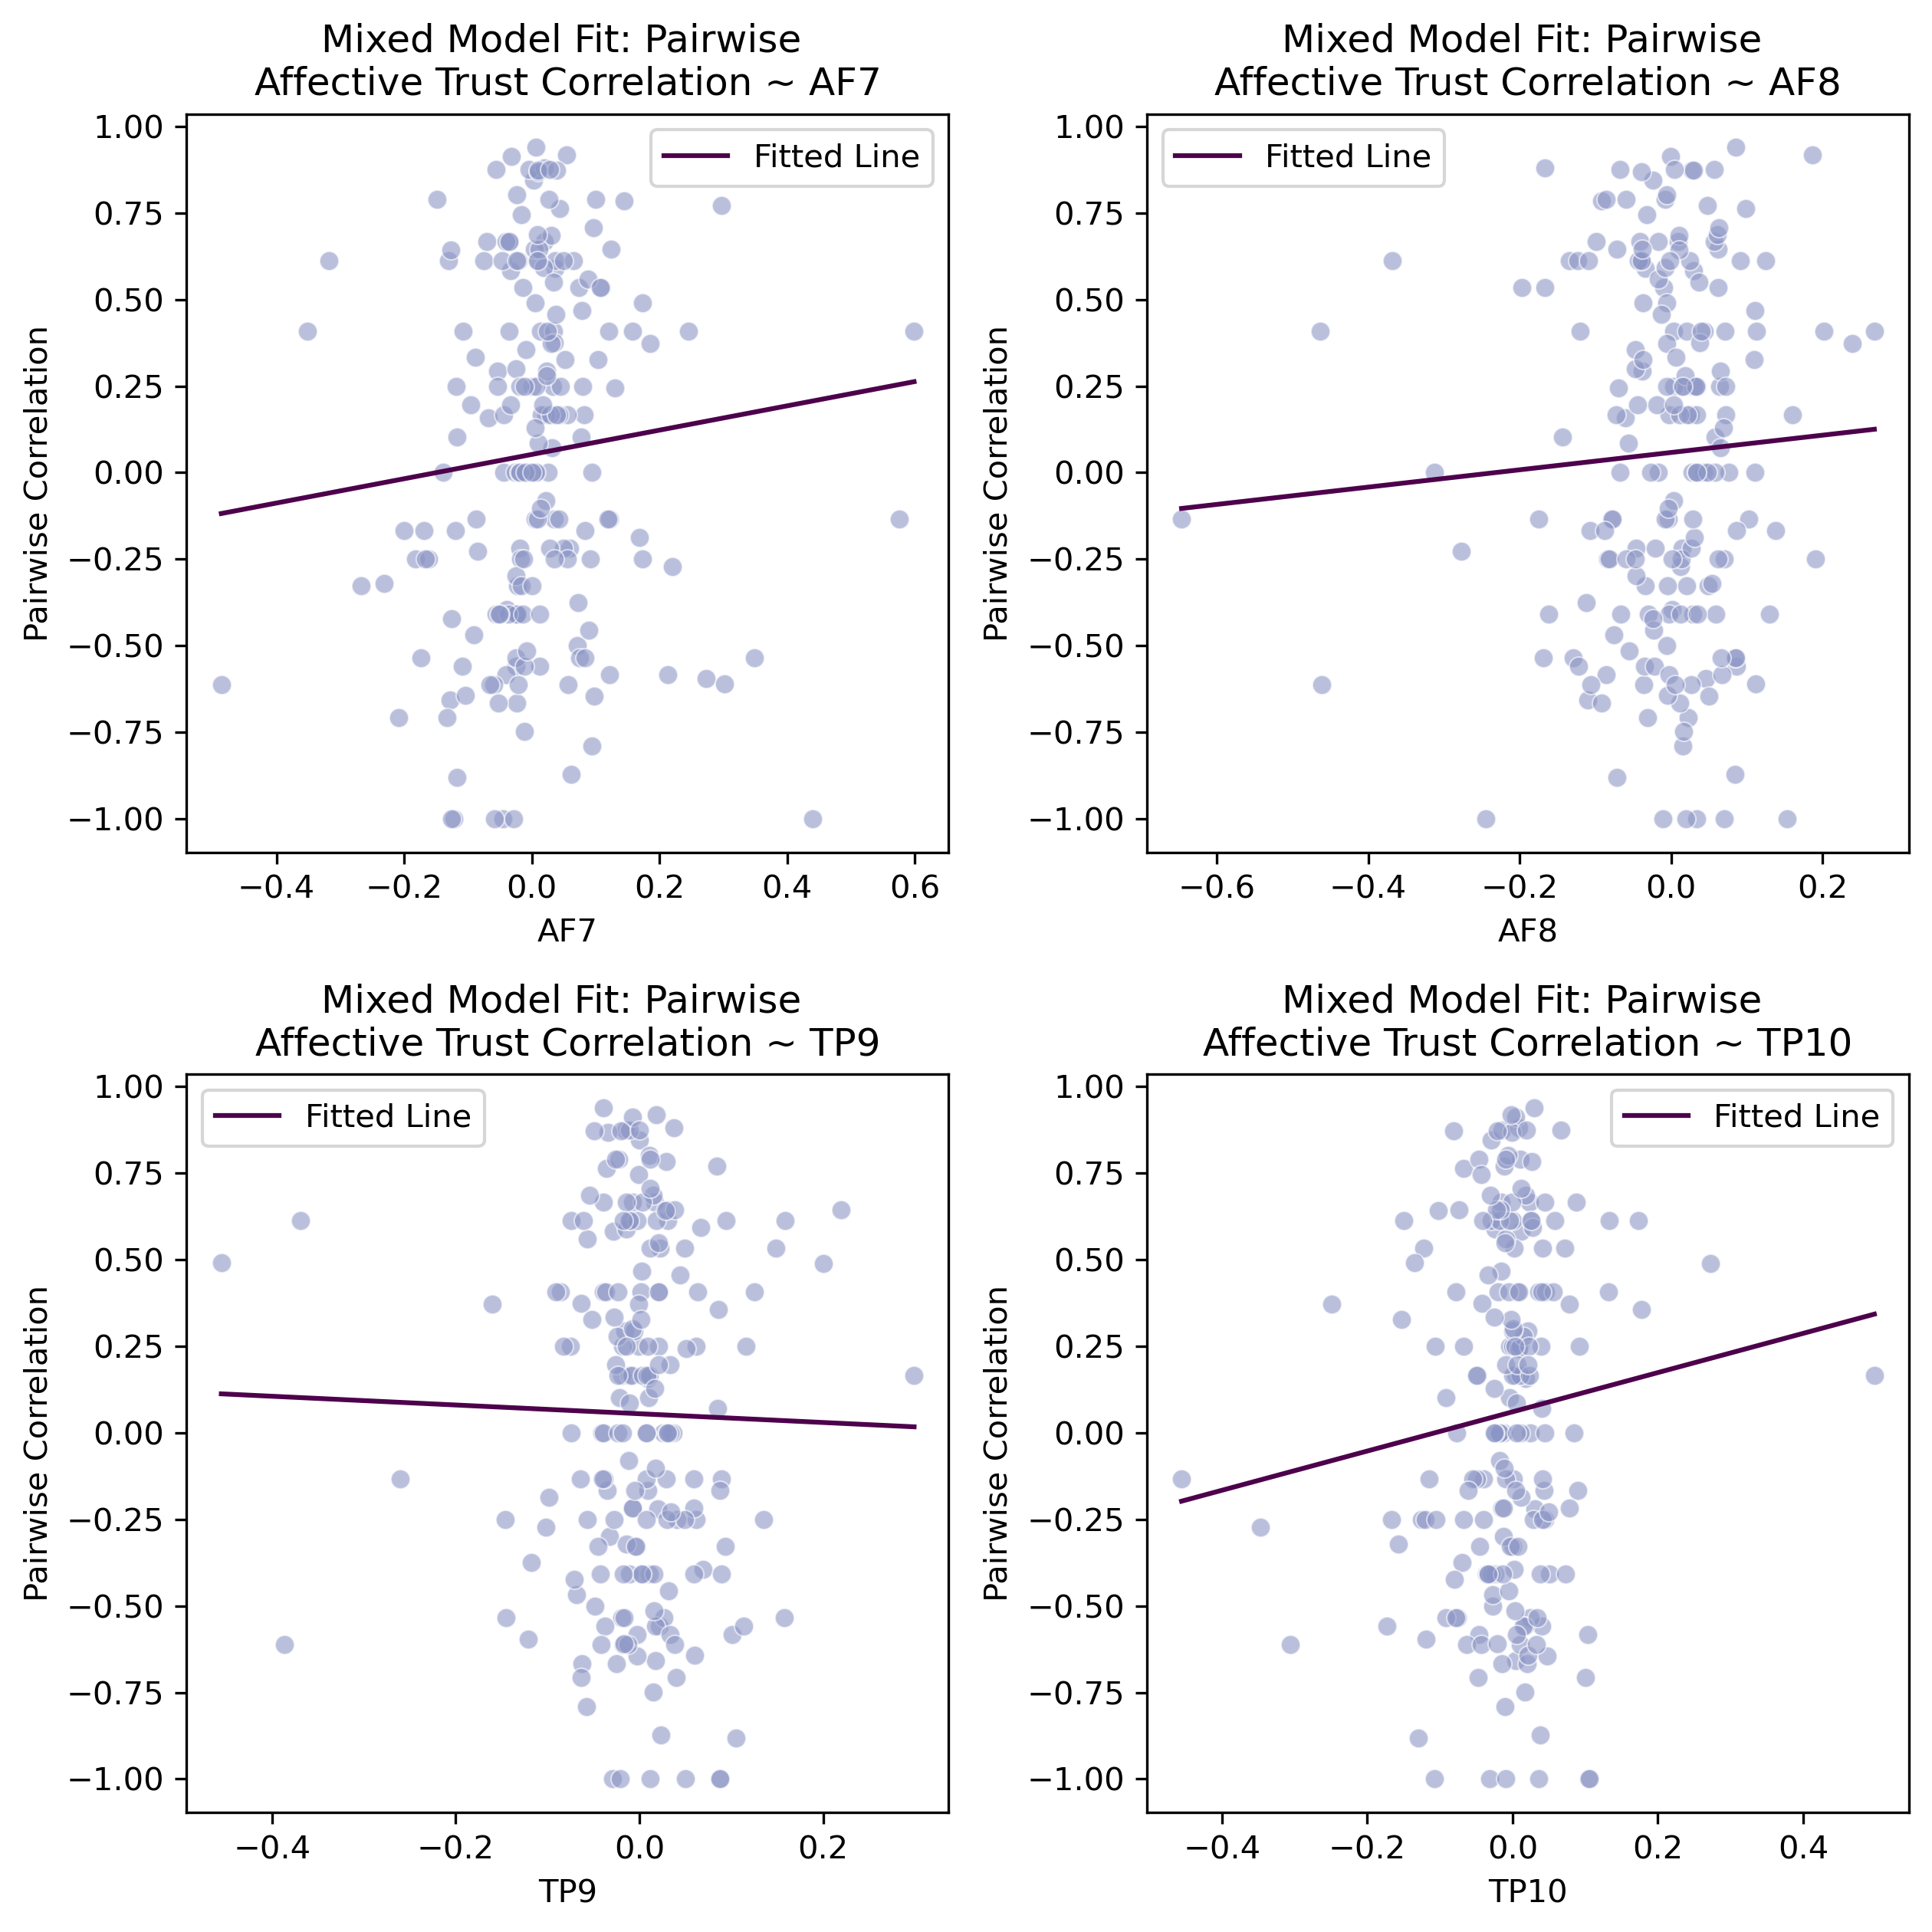

In [26]:
# Plot the mixed model of electrode on pairwise cognitive_trust correlation

# Prepare the grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5), dpi=300)  # Adjust figsize to 8.5 x 8.5 inches

electrodes = ['AF7', 'AF8', 'TP9', 'TP10']

for i, electrode in enumerate(electrodes):
    # Fit the model for the current electrode
    model = smf.mixedlm(f"affecttrust_corr ~ {electrode}", data=corr_df_clean_trust, groups=corr_df_clean_trust["subj"], re_formula="1",
                        vc_formula={"ses": "0 + C(ses)"}).fit()
    
    # Get predicted values for a range of electrode values
    electrode_values = np.linspace(corr_df_clean_trust[electrode].min(), corr_df_clean_trust[electrode].max(), 100)
    predicted_performance = model.params['Intercept'] + model.params[electrode] * electrode_values
    
    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plot the observed data using the specified color
    sns.scatterplot(x=electrode, y='affecttrust_corr', data=corr_df_clean_trust, color='#8c96c6', alpha=0.6, ax=ax)
    
    # Plot the fitted line using the specified color
    ax.plot(electrode_values, predicted_performance, color='#4d004b', label='Fitted Line')
    
    # Set titles and labels
    ax.set_xlabel(electrode)
    ax.set_ylabel('Pairwise Correlation')
    ax.set_title(f'Mixed Model Fit: Pairwise \nAffective Trust Correlation ~ {electrode}')
    ax.legend()

# Ensure the background of the figure is white
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('plots/model_fits_pairwise_affective_trust_correlation.png', format='png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')  # Save the figure
plt.show()
